# Test of doubly tapered Mestel disk simulation with EXP

$$
\Psi_o(R) = V_o^2 \log\frac{R}{R_o} \qquad \Sigma(R) = \frac{V_o^2}{2\pi G R} T_{inner}(R) T_{outer}(R)
$$
where
$$
T_{inner}(R) = \frac{R^\nu}{R_i^\nu | R^\nu}
$$
and
$$
T_{outer}(R) = \frac{R_o^\mu}{R_o^\mu+R^\mu}
$$

### pyEXP setup

In [1]:
import os
import copy
import yaml
import time
import pyEXP
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm, colors
from os.path import exists

plt.rcParams['figure.figsize'] = [12, 9]

# Change to the example's working directory
os.chdir('Zang')
print(os.getcwd())

# Clean the data directory


/home/weinberg/Projects/pyEXP-examples/Tutorials/EXP/Zang


<>:22: SyntaxWarning: invalid escape sequence '\S'
<>:22: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipykernel_3373/2156287017.py:22: SyntaxWarning: invalid escape sequence '\S'
  plt.ylabel('$\Sigma(R)$')


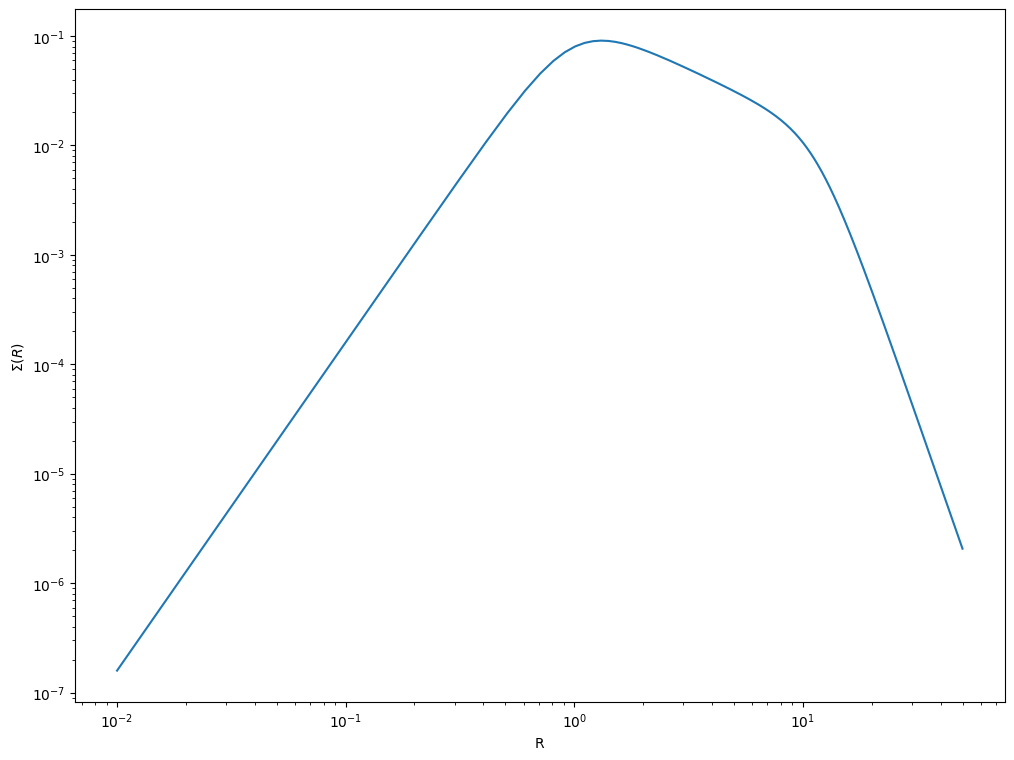

In [2]:
Ri = 1.0
Ro = 11.5
Vo = 1.0
Nu = 4.0
Mu = 5.0
Rmin = 0.01
Rmax = 50.0

def Tinner(R, nu):
    return np.power(R, nu)/(np.power(R, nu) + np.power(Ri, nu))

def Touter(R, mu):
    return np.power(Ro, mu)/(np.power(R, mu) + np.power(Ro, mu))

def Sigma(R, nu, mu):
    return Vo**2/(2*np.pi*R)*Tinner(R, nu)*Touter(R, mu)

R = np.arange(Rmin, Rmax, 0.1)
D = Sigma(R, Nu, Mu)
plt.loglog(R, D)
plt.xlabel('R')
plt.ylabel('$\Sigma(R)$')
plt.savefig('density.png')
plt.show()

## Make initial conditions

Initial conditions can be made with the `zangics` utility.  The options are:

In [3]:
! zangics -h

Ideal tapered Mestel IC generator
Usage:
  zangics [OPTION...]

  -h, --help        Print this help message
  -V, --nozerovel   Do not zero the mean velocity
  -P, --nozeropos   Do not zero the center of mass
  -d, --debug       Print debug grid
  -N, --number arg  Number of particles to generate (default: 100000)
  -n, --nu arg      Inner taper exponent (0 for no taper) (default: 2.0)
  -m, --mu arg      Outer taper exponent (0 for no taper) (default: 2.0)
  -i, --Ri arg      Inner radius for taper (default: 1.0)
  -o, --Ro arg      Outer radius for taper (default: 20.0)
  -r, --Rmin arg    Inner radius for model (default: 0.001)
  -R, --Rmax arg    Outer radius for model (default: 50.0)
  -S, --sigma arg   Radial velocity dispersion (default: 1.0)
  -s, --seed arg    Random number seed. Default: use /dev/random
  -f, --file arg    Output body file (default: zang.bods)




Let's make a set of initial conditions for the disk illustrated above.

In [4]:
N = 100000
S = 0.2
os.system('zangics --number {} --nu {} --mu {} --Rmin {} --Rmax {} --sigma {}'.format(N, Nu, Mu, Rmin, Rmax, S))


0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

** Main loop complete
** Position center: -0.0399281, 0.0201501, 0
** Velocity center: -0.00388513, -0.00212088, 0
** 0 particles failed acceptance
** Particle mass=0.000201561
** 2T/VC=1.00225


0

### Running the simulation

We have provided a sample `exp` configuration file in this working directory.  The default name for a configuration file is
`config.yml`.    

The basis build can take minutes.  If you want to experiment with the disk parameters, be prepared to wait a few minutes while 
the basis rebuilds.  The entire run will take under an hour; and under 10 minutes on a modern laptop.  So be prepared to 
take a short break. 

The `exp` code will run for 1000 steps.  You can estimate the total run time by looking at the last line of every step diagnostic 
stanza that estimates the time needed for each part of the caluculation.  The 'Total' field is the total run time in seconds per step.  E.g. if your computer is requiring 0.3 seconds per step, the completion time will be 10 minutes.

In [ ]:
%%time
! rm data/*
! mpirun exp

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#   Node name           PID         Executable                              
-   ---------           ---         ----------                              
0   d1ba6fabd2c3        3442        exp                                     
1   d1ba6fabd2c3        3443        exp                                     
2   d1ba6fabd2c3        3444        exp                                     
3   d1ba6fabd2c3        3445        exp                                     
4   d1ba6fabd2c3        3446        exp                                     
5   d1ba6fabd2c3        3447        exp                                     
6   d1ba6fabd2c3        3448        exp                                     
7   d1ba6fabd2c3        3449        exp                                     
8   d1ba6fabd2c3        3450        exp                                     
9   d1ba6fabd2c3        3452        exp                                


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.6%
--- Adj/Tot = 0.1%
--- Update  = 5.0785e-02 sec
--- Collate = 1.0141e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=4.312601e-06     < 6.250000e-03     [21]
--- Max DT=3.036377e-01     > 1.000000e-01     [70164]
----------------------------------------------------------------------
              Component <disk> |   low: 21/100000
              Component <disk> |  high: 70164/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=0.3] -----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000297415        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.2%
--- Adj/Tot = 0.1%
--- Update  = 5.7326e-02 sec
--- Collate = 7.0321e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=7.078000e-06     < 6.250000e-03     [23]
--- Max DT=3.035445e-01     > 1.000000e-01     [70150]
----------------------------------------------------------------------
              Component <disk> |   low: 23/100000
              Component <disk> |  high: 70150/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=0.7] -----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000698036        [  0.02 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.2%
--- Adj/Tot = 0.1%
--- Update  = 9.2195e-02 sec
--- Collate = 3.4313e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=7.521769e-05     < 6.250000e-03     [24]
--- Max DT=3.034151e-01     > 1.000000e-01     [70163]
----------------------------------------------------------------------
              Component <disk> |   low: 24/100000
              Component <disk> |  high: 70163/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=1.1] -----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000507009        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.4%
--- Adj/Tot = 0.1%
--- Update  = 6.0299e-02 sec
--- Collate = 8.0235e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=8.901691e-05     < 6.250000e-03     [15]
--- Max DT=3.032515e-01     > 1.000000e-01     [70156]
----------------------------------------------------------------------
              Component <disk> |   low: 15/100000
              Component <disk> |  high: 70156/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=1.5] -----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000582398        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.2%
--- Adj/Tot = 0.1%
--- Update  = 7.3372e-02 sec
--- Collate = 1.1031e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.136890e-05     < 6.250000e-03     [20]
--- Max DT=3.030502e-01     > 1.000000e-01     [70150]
----------------------------------------------------------------------
              Component <disk> |   low: 20/100000
              Component <disk> |  high: 70150/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=1.9] -----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000669688        [  0.02 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.2%
--- Adj/Tot = 0.1%
--- Update  = 6.2607e-02 sec
--- Collate = 1.3020e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.695865e-04     < 6.250000e-03     [22]
--- Max DT=3.028340e-01     > 1.000000e-01     [70139]
----------------------------------------------------------------------
              Component <disk> |   low: 22/100000
              Component <disk> |  high: 70139/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=2.3] -----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000425103        [  0.01 %]
Velocity        

3   : 6650      400       87        3         2         
4   : 6659      387       88        8         0         
5   : 6682      378       75        4         3         
6   : 6638      408       91        3         2         
7   : 6621      424       84        8         5         
8   : 6656      386       87        9         4         
9   : 6630      412       85        8         7         
10  : 6586      456       90        8         2         
11  : 6635      412       86        8         1         
12  : 6655      398       81        4         4         
13  : 6624      442       79        5         4         

T   : 92944     5742      1186      82        46         [100000]
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.2%
--- Adj/Tot = 0.1%
--- Update  = 9.0356e-02 sec
--- Collate = 6.0270e-03 sec
--------------------------------------


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.2%
--- Adj/Tot = 0.1%
--- Update  = 8.5523e-02 sec
--- Collate = 1.0960e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.007218e-04     < 6.250000e-03     [21]
--- Max DT=3.028460e-01     > 1.000000e-01     [70133]
----------------------------------------------------------------------
              Component <disk> |   low: 21/100000
              Component <disk> |  high: 70133/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=3] -------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000543465        [  0.01 %]
Velocity        

5   : 6685      376       73        7         1         
6   : 6641      406       89        6         0         
7   : 6615      430       83        6         8         
8   : 6651      391       84        9         7         
9   : 6625      414       89        8         6         
10  : 6586      454       91        7         4         
11  : 6629      415       89        5         4         
12  : 6654      401       80        1         6         
13  : 6626      440       78        7         3         

T   : 92919     5758      1192      83        48         [100000]
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.2%
--- Adj/Tot = 0.1%
--- Update  = 7.2298e-02 sec
--- Collate = 9.0737e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multi


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.4%
--- Adj/Tot = 0.1%
--- Update  = 5.4507e-02 sec
--- Collate = 7.0310e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.299656e-04     < 6.250000e-03     [24]
--- Max DT=3.028405e-01     > 1.000000e-01     [70121]
----------------------------------------------------------------------
              Component <disk> |   low: 24/100000
              Component <disk> |  high: 70121/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=3.7] -----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000439026        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.5%
--- Adj/Tot = 0.1%
--- Update  = 4.1276e-02 sec
--- Collate = 2.0535e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=9.717824e-05     < 6.250000e-03     [25]
--- Max DT=3.028366e-01     > 1.000000e-01     [70112]
----------------------------------------------------------------------
              Component <disk> |   low: 25/100000
              Component <disk> |  high: 70112/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=4.1] -----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00379102         [  0.09 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.2%
--- Adj/Tot = 0.1%
--- Update  = 6.0275e-02 sec
--- Collate = 9.0067e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=4.556408e-05     < 6.250000e-03     [22]
--- Max DT=3.028724e-01     > 1.000000e-01     [70116]
----------------------------------------------------------------------
              Component <disk> |   low: 22/100000
              Component <disk> |  high: 70116/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=4.5] -----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000479144        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.3%
--- Adj/Tot = 0.1%
--- Update  = 5.6121e-02 sec
--- Collate = 1.3010e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=6.173485e-05     < 6.250000e-03     [22]
--- Max DT=3.029729e-01     > 1.000000e-01     [70126]
----------------------------------------------------------------------
              Component <disk> |   low: 22/100000
              Component <disk> |  high: 70126/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=4.9] -----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000416374        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.4%
--- Adj/Tot = 0.1%
--- Update  = 7.3542e-02 sec
--- Collate = 1.5009e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.042563e-05     < 6.250000e-03     [31]
--- Max DT=3.031221e-01     > 1.000000e-01     [70100]
----------------------------------------------------------------------
              Component <disk> |   low: 31/100000
              Component <disk> |  high: 70100/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=5.3] -----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000406031        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.4%
--- Adj/Tot = 0.1%
--- Update  = 4.1778e-02 sec
--- Collate = 6.0631e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=8.138068e-05     < 6.250000e-03     [26]
--- Max DT=3.032562e-01     > 1.000000e-01     [70097]
----------------------------------------------------------------------
              Component <disk> |   low: 26/100000
              Component <disk> |  high: 70097/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=5.7] -----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000278288        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.4%
--- Adj/Tot = 0.1%
--- Update  = 6.6190e-02 sec
--- Collate = 3.4379e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=5.172825e-05     < 6.250000e-03     [26]
--- Max DT=3.033743e-01     > 1.000000e-01     [70088]
----------------------------------------------------------------------
              Component <disk> |   low: 26/100000
              Component <disk> |  high: 70088/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=6.1] -----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00107963         [  0.03 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.3%
--- Adj/Tot = 0.2%
--- Update  = 8.6080e-02 sec
--- Collate = 1.2043e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.000055e-04     < 6.250000e-03     [20]
--- Max DT=3.034739e-01     > 1.000000e-01     [70098]
----------------------------------------------------------------------
              Component <disk> |   low: 20/100000
              Component <disk> |  high: 70098/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=6.5] -----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000591323        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Timer info in comp, mlevel=3--------------------------------------
----------------------------------------------------------------------
               COM:       2.593810e-04
          Position:       2.193535e+01
                    --------------------------------------------------
                *** fix pos                       : 1.099097e+01      
                    --------------------------------------------------
           Ang mom:       3.231273e+00
              Zero:       6.868016e-02
             Accel:       2.745265e+00
                    --------------------------------------------------
                *** threaded                      :       0.000000e+00
                    --------------------------------------------------
       Interaction:       3.794840e-04
                    --------------------------------------------------
                *** threaded                      :    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.4%
--- Adj/Tot = 0.1%
--- Update  = 6.5561e-02 sec
--- Collate = 3.1917e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.765303e-05     < 6.250000e-03     [26]
--- Max DT=3.035975e-01     > 1.000000e-01     [70071]
----------------------------------------------------------------------
              Component <disk> |   low: 26/100000
              Component <disk> |  high: 70071/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=7.2] -----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000432235        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Timer info [T=7.5] -----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000267928        [  0.01 %]
Velocity            : 0.0012811          [  0.04 %]
Force               : 0.541397           [ 15.44 %]
Coefs               : 2.2202             [ 63.32 %]
Output              : 0.00123923         [  0.04 %]
Levels              : 0.00851782         [  0.24 %]
Report              : 7.49e-07           [  0.00 %]
Balance             : 4.86e-07           [  0.00 %]
Adjust              : 0.733079           [ 20.91 %]
Total               : 3.50604            [100.00 %]
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Level info--------------------------------------------------------
----------------------------------------------------


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.4%
--- Adj/Tot = 0.1%
--- Update  = 5.6906e-02 sec
--- Collate = 3.2865e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.508285e-04     < 6.250000e-03     [20]
--- Max DT=3.036644e-01     > 1.000000e-01     [70068]
----------------------------------------------------------------------
              Component <disk> |   low: 20/100000
              Component <disk> |  high: 70068/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=7.9] -----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00400443         [  0.10 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.4%
--- Adj/Tot = 0.1%
--- Update  = 9.3238e-02 sec
--- Collate = 2.7111e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.544104e-04     < 6.250000e-03     [25]
--- Max DT=3.036780e-01     > 1.000000e-01     [70058]
----------------------------------------------------------------------
              Component <disk> |   low: 25/100000
              Component <disk> |  high: 70058/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=8.3] -----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00138672         [  0.02 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.1%
--- Adj/Tot = 0.1%
--- Update  = 1.0152e-01 sec
--- Collate = 1.6046e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=5.772595e-05     < 6.250000e-03     [19]
--- Max DT=3.036705e-01     > 1.000000e-01     [70045]
----------------------------------------------------------------------
              Component <disk> |   low: 19/100000
              Component <disk> |  high: 70045/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=8.7] -----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000550138        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.5%
--- Adj/Tot = 0.1%
--- Update  = 4.9060e-02 sec
--- Collate = 1.4038e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.745450e-04     < 6.250000e-03     [20]
--- Max DT=3.036445e-01     > 1.000000e-01     [70045]
----------------------------------------------------------------------
              Component <disk> |   low: 20/100000
              Component <disk> |  high: 70045/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=9.1] -----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000550468        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 23.0%
--- Adj/Tot = 0.2%
--- Update  = 8.1705e-02 sec
--- Collate = 6.1488e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=5.210488e-05     < 6.250000e-03     [29]
--- Max DT=3.035982e-01     > 1.000000e-01     [70068]
----------------------------------------------------------------------
              Component <disk> |   low: 29/100000
              Component <disk> |  high: 70068/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=9.5] -----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000564889        [  0.01 %]
Velocity       


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.5%
--- Adj/Tot = 0.2%
--- Update  = 6.9543e-02 sec
--- Collate = 1.3100e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=7.237078e-04     < 6.250000e-03     [23]
--- Max DT=3.035289e-01     > 1.000000e-01     [70073]
----------------------------------------------------------------------
              Component <disk> |   low: 23/100000
              Component <disk> |  high: 70073/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=9.9] -----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000669869        [  0.02 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.4%
--- Adj/Tot = 0.2%
--- Update  = 3.5227e-02 sec
--- Collate = 9.2898e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.764638e-04     < 6.250000e-03     [18]
--- Max DT=3.034370e-01     > 1.000000e-01     [70092]
----------------------------------------------------------------------
              Component <disk> |   low: 18/100000
              Component <disk> |  high: 70092/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=10.3] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000704759        [  0.02 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.6%
--- Adj/Tot = 0.2%
--- Update  = 4.0930e-02 sec
--- Collate = 8.6672e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=9.857916e-05     < 6.250000e-03     [27]
--- Max DT=3.033265e-01     > 1.000000e-01     [70142]
----------------------------------------------------------------------
              Component <disk> |   low: 27/100000
              Component <disk> |  high: 70142/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=10.7] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000261086        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.4%
--- Adj/Tot = 0.2%
--- Update  = 7.8508e-02 sec
--- Collate = 1.4018e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.023953e-04     < 6.250000e-03     [27]
--- Max DT=3.031947e-01     > 1.000000e-01     [70175]
----------------------------------------------------------------------
              Component <disk> |   low: 27/100000
              Component <disk> |  high: 70175/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=11.1] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000490528        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.5%
--- Adj/Tot = 0.2%
--- Update  = 5.3414e-02 sec
--- Collate = 8.0336e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.674481e-04     < 6.250000e-03     [22]
--- Max DT=3.030805e-01     > 1.000000e-01     [70245]
----------------------------------------------------------------------
              Component <disk> |   low: 22/100000
              Component <disk> |  high: 70245/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=11.5] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000880098        [  0.02 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.4%
--- Adj/Tot = 0.2%
--- Update  = 5.0089e-02 sec
--- Collate = 2.0995e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.941657e-04     < 6.250000e-03     [22]
--- Max DT=3.029750e-01     > 1.000000e-01     [70282]
----------------------------------------------------------------------
              Component <disk> |   low: 22/100000
              Component <disk> |  high: 70282/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=11.9] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000516464        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.5%
--- Adj/Tot = 0.2%
--- Update  = 9.9386e-02 sec
--- Collate = 6.0512e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=6.567253e-05     < 6.250000e-03     [23]
--- Max DT=3.028426e-01     > 1.000000e-01     [70312]
----------------------------------------------------------------------
              Component <disk> |   low: 23/100000
              Component <disk> |  high: 70312/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=12.3] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00188547         [  0.04 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.4%
--- Adj/Tot = 0.3%
--- Update  = 4.8436e-02 sec
--- Collate = 5.3490e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=9.744901e-05     < 6.250000e-03     [24]
--- Max DT=3.026813e-01     > 1.000000e-01     [70366]
----------------------------------------------------------------------
              Component <disk> |   low: 24/100000
              Component <disk> |  high: 70366/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=12.7] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000492411        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.6%
--- Adj/Tot = 0.3%
--- Update  = 3.9391e-02 sec
--- Collate = 3.0373e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.479626e-05     < 6.250000e-03     [26]
--- Max DT=3.025395e-01     > 1.000000e-01     [70452]
----------------------------------------------------------------------
              Component <disk> |   low: 26/100000
              Component <disk> |  high: 70452/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=13.1] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000406647        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.4%
--- Adj/Tot = 0.2%
--- Update  = 1.1048e-01 sec
--- Collate = 1.0776e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.789736e-05     < 6.250000e-03     [24]
--- Max DT=3.025149e-01     > 1.000000e-01     [70507]
----------------------------------------------------------------------
              Component <disk> |   low: 24/100000
              Component <disk> |  high: 70507/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=13.5] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00148922         [  0.03 %]
Velocity        


----------------------------------------------------------------------
--- Timer info in comp, mlevel=3--------------------------------------
----------------------------------------------------------------------
               COM:       2.618230e-04
          Position:       2.170547e+01
                    --------------------------------------------------
                *** fix pos                       : 1.125120e+01      
                    --------------------------------------------------
           Ang mom:       3.180517e+00
              Zero:       8.593639e-02
             Accel:       2.551630e+00
                    --------------------------------------------------
                *** threaded                      :       0.000000e+00
                    --------------------------------------------------
       Interaction:       3.808430e-04
                    --------------------------------------------------
                *** threaded                      :    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.4%
--- Adj/Tot = 0.2%
--- Update  = 7.3535e-02 sec
--- Collate = 6.0676e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.814888e-05     < 6.250000e-03     [15]
--- Max DT=3.024835e-01     > 1.000000e-01     [70632]
----------------------------------------------------------------------
              Component <disk> |   low: 15/100000
              Component <disk> |  high: 70632/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=14.2] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000632093        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.4%
--- Adj/Tot = 0.3%
--- Update  = 4.1527e-02 sec
--- Collate = 7.0076e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=7.412084e-05     < 6.250000e-03     [29]
--- Max DT=3.024814e-01     > 1.000000e-01     [70697]
----------------------------------------------------------------------
              Component <disk> |   low: 29/100000
              Component <disk> |  high: 70697/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=14.6] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000204324        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.4%
--- Adj/Tot = 0.3%
--- Update  = 3.3152e-02 sec
--- Collate = 8.1258e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.925141e-05     < 6.250000e-03     [20]
--- Max DT=3.024758e-01     > 1.000000e-01     [70737]
----------------------------------------------------------------------
              Component <disk> |   low: 20/100000
              Component <disk> |  high: 70737/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=15] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000761381        [  0.02 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.3%
--- Adj/Tot = 0.3%
--- Update  = 1.7550e-01 sec
--- Collate = 4.8157e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.362410e-05     < 6.250000e-03     [28]
--- Max DT=3.024696e-01     > 1.000000e-01     [70792]
----------------------------------------------------------------------
              Component <disk> |   low: 28/100000
              Component <disk> |  high: 70792/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=15.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000564286        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.4%
--- Adj/Tot = 0.3%
--- Update  = 9.2051e-02 sec
--- Collate = 7.0330e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.343297e-04     < 6.250000e-03     [25]
--- Max DT=3.024645e-01     > 1.000000e-01     [70826]
----------------------------------------------------------------------
              Component <disk> |   low: 25/100000
              Component <disk> |  high: 70826/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=15.8] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00487712         [  0.11 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.5%
--- Adj/Tot = 0.3%
--- Update  = 7.0945e-02 sec
--- Collate = 1.2986e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.383849e-05     < 6.250000e-03     [26]
--- Max DT=3.025229e-01     > 1.000000e-01     [70872]
----------------------------------------------------------------------
              Component <disk> |   low: 26/100000
              Component <disk> |  high: 70872/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=16.2] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000775847        [  0.02 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.7%
--- Adj/Tot = 0.3%
--- Update  = 6.5078e-02 sec
--- Collate = 4.0512e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.576076e-04     < 6.250000e-03     [26]
--- Max DT=3.026228e-01     > 1.000000e-01     [70871]
----------------------------------------------------------------------
              Component <disk> |   low: 26/100000
              Component <disk> |  high: 70871/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=16.6] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000526674        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.8%
--- Adj/Tot = 0.3%
--- Update  = 5.1291e-02 sec
--- Collate = 3.4685e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=9.006483e-06     < 6.250000e-03     [41]
--- Max DT=3.027133e-01     > 1.000000e-01     [70848]
----------------------------------------------------------------------
              Component <disk> |   low: 41/100000
              Component <disk> |  high: 70848/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=17] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00498879         [  0.15 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 32.5%
--- Adj/Tot = 0.3%
--- Update  = 5.0946e-02 sec
--- Collate = 7.0339e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.085239e-05     < 6.250000e-03     [44]
--- Max DT=3.027923e-01     > 1.000000e-01     [70836]
----------------------------------------------------------------------
              Component <disk> |   low: 44/100000
              Component <disk> |  high: 70836/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=17.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000575023        [  0.01 %]
Velocity       


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.5%
--- Adj/Tot = 0.3%
--- Update  = 8.6399e-02 sec
--- Collate = 1.2037e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.519952e-04     < 6.250000e-03     [36]
--- Max DT=3.028757e-01     > 1.000000e-01     [70828]
----------------------------------------------------------------------
              Component <disk> |   low: 36/100000
              Component <disk> |  high: 70828/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=17.8] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000452478        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.2%
--- Adj/Tot = 0.3%
--- Update  = 1.5771e-01 sec
--- Collate = 2.9023e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=5.401416e-05     < 6.250000e-03     [45]
--- Max DT=3.030380e-01     > 1.000000e-01     [70825]
----------------------------------------------------------------------
              Component <disk> |   low: 45/100000
              Component <disk> |  high: 70825/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=18.2] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00103079         [  0.03 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.7%
--- Adj/Tot = 0.3%
--- Update  = 6.0106e-02 sec
--- Collate = 1.2071e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.730905e-04     < 6.250000e-03     [43]
--- Max DT=3.031942e-01     > 1.000000e-01     [70785]
----------------------------------------------------------------------
              Component <disk> |   low: 43/100000
              Component <disk> |  high: 70785/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=18.6] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000752826        [  0.02 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.6%
--- Adj/Tot = 0.3%
--- Update  = 9.3566e-02 sec
--- Collate = 1.1033e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=6.007970e-05     < 6.250000e-03     [52]
--- Max DT=3.033473e-01     > 1.000000e-01     [70718]
----------------------------------------------------------------------
              Component <disk> |   low: 52/100000
              Component <disk> |  high: 70718/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=19] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000428704        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.1%
--- Adj/Tot = 0.4%
--- Update  = 3.7803e-02 sec
--- Collate = 1.0160e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=4.884449e-05     < 6.250000e-03     [43]
--- Max DT=3.034961e-01     > 1.000000e-01     [70633]
----------------------------------------------------------------------
              Component <disk> |   low: 43/100000
              Component <disk> |  high: 70633/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=19.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000188532        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.7%
--- Adj/Tot = 0.4%
--- Update  = 4.1616e-02 sec
--- Collate = 8.0196e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=6.336047e-06     < 6.250000e-03     [30]
--- Max DT=3.036388e-01     > 1.000000e-01     [70560]
----------------------------------------------------------------------
              Component <disk> |   low: 30/100000
              Component <disk> |  high: 70560/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=19.8] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000182045        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Timer info [T=20.1] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000444268        [  0.01 %]
Velocity            : 0.00568567         [  0.16 %]
Force               : 0.643597           [ 17.63 %]
Coefs               : 2.21946            [ 60.78 %]
Output              : 0.00102209         [  0.03 %]
Levels              : 0.00848496         [  0.23 %]
Report              : 9.06e-07           [  0.00 %]
Balance             : 3.9e-07            [  0.00 %]
Adjust              : 0.772817           [ 21.16 %]
Total               : 3.65157            [100.00 %]
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Level info--------------------------------------------------------
----------------------------------------------------


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.7%
--- Adj/Tot = 0.4%
--- Update  = 3.4612e-02 sec
--- Collate = 6.0103e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=5.427929e-05     < 6.250000e-03     [40]
--- Max DT=3.038540e-01     > 1.000000e-01     [70396]
----------------------------------------------------------------------
              Component <disk> |   low: 40/100000
              Component <disk> |  high: 70396/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=20.5] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000658514        [  0.02 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.7%
--- Adj/Tot = 0.3%
--- Update  = 5.4588e-02 sec
--- Collate = 5.0442e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.498542e-05     < 6.250000e-03     [38]
--- Max DT=3.039617e-01     > 1.000000e-01     [70286]
----------------------------------------------------------------------
              Component <disk> |   low: 38/100000
              Component <disk> |  high: 70286/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=20.9] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000636295        [  0.02 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 22.4%
--- Adj/Tot = 0.4%
--- Update  = 5.8501e-02 sec
--- Collate = 1.6030e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=4.500458e-05     < 6.250000e-03     [37]
--- Max DT=3.040589e-01     > 1.000000e-01     [70179]
----------------------------------------------------------------------
              Component <disk> |   low: 37/100000
              Component <disk> |  high: 70179/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=21.3] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000789747        [  0.02 %]
Velocity       


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.8%
--- Adj/Tot = 0.3%
--- Update  = 5.7390e-02 sec
--- Collate = 7.0396e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.053627e-04     < 6.250000e-03     [42]
--- Max DT=3.041732e-01     > 1.000000e-01     [70110]
----------------------------------------------------------------------
              Component <disk> |   low: 42/100000
              Component <disk> |  high: 70110/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=21.6] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000430543        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.7%
--- Adj/Tot = 0.3%
--- Update  = 7.5543e-02 sec
--- Collate = 1.2042e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.839424e-05     < 6.250000e-03     [54]
--- Max DT=3.043277e-01     > 1.000000e-01     [70005]
----------------------------------------------------------------------
              Component <disk> |   low: 54/100000
              Component <disk> |  high: 70005/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=22] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00048352         [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.6%
--- Adj/Tot = 0.4%
--- Update  = 3.5350e-02 sec
--- Collate = 8.0485e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.965855e-05     < 6.250000e-03     [53]
--- Max DT=3.044488e-01     > 1.000000e-01     [69905]
----------------------------------------------------------------------
              Component <disk> |   low: 53/100000
              Component <disk> |  high: 69905/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=22.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000857419        [  0.03 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.7%
--- Adj/Tot = 0.3%
--- Update  = 6.3409e-02 sec
--- Collate = 1.0017e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=5.144397e-05     < 6.250000e-03     [60]
--- Max DT=3.045418e-01     > 1.000000e-01     [69837]
----------------------------------------------------------------------
              Component <disk> |   low: 60/100000
              Component <disk> |  high: 69837/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=22.8] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00111746         [  0.03 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.6%
--- Adj/Tot = 0.3%
--- Update  = 4.1068e-02 sec
--- Collate = 8.0145e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=8.460573e-05     < 6.250000e-03     [53]
--- Max DT=3.045996e-01     > 1.000000e-01     [69809]
----------------------------------------------------------------------
              Component <disk> |   low: 53/100000
              Component <disk> |  high: 69809/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=23.2] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00112387         [  0.03 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.7%
--- Adj/Tot = 0.4%
--- Update  = 4.0219e-02 sec
--- Collate = 6.9561e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.883938e-06     < 6.250000e-03     [49]
--- Max DT=3.046201e-01     > 1.000000e-01     [69788]
----------------------------------------------------------------------
              Component <disk> |   low: 49/100000
              Component <disk> |  high: 69788/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=23.6] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000508502        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.5%
--- Adj/Tot = 0.4%
--- Update  = 4.3791e-02 sec
--- Collate = 7.0145e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=9.413192e-05     < 6.250000e-03     [64]
--- Max DT=3.046016e-01     > 1.000000e-01     [69798]
----------------------------------------------------------------------
              Component <disk> |   low: 64/100000
              Component <disk> |  high: 69798/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=24] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000163972        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.5%
--- Adj/Tot = 0.5%
--- Update  = 6.6823e-02 sec
--- Collate = 7.0094e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.305192e-04     < 6.250000e-03     [60]
--- Max DT=3.045432e-01     > 1.000000e-01     [69848]
----------------------------------------------------------------------
              Component <disk> |   low: 60/100000
              Component <disk> |  high: 69848/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=24.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000264359        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.6%
--- Adj/Tot = 0.4%
--- Update  = 6.8636e-02 sec
--- Collate = 7.0197e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.636158e-05     < 6.250000e-03     [56]
--- Max DT=3.044465e-01     > 1.000000e-01     [69838]
----------------------------------------------------------------------
              Component <disk> |   low: 56/100000
              Component <disk> |  high: 69838/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=24.8] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000498716        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.8%
--- Adj/Tot = 0.6%
--- Update  = 7.2894e-02 sec
--- Collate = 8.0268e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.042492e-05     < 6.250000e-03     [60]
--- Max DT=3.043096e-01     > 1.000000e-01     [69872]
----------------------------------------------------------------------
              Component <disk> |   low: 60/100000
              Component <disk> |  high: 69872/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=25.2] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000549795        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.8%
--- Adj/Tot = 0.5%
--- Update  = 5.5865e-02 sec
--- Collate = 5.4977e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=9.038397e-05     < 6.250000e-03     [64]
--- Max DT=3.041488e-01     > 1.000000e-01     [69899]
----------------------------------------------------------------------
              Component <disk> |   low: 64/100000
              Component <disk> |  high: 69899/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=25.6] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00101317         [  0.03 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.6%
--- Adj/Tot = 0.5%
--- Update  = 6.2399e-02 sec
--- Collate = 9.0087e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=5.398741e-06     < 6.250000e-03     [68]
--- Max DT=3.041971e-01     > 1.000000e-01     [69920]
----------------------------------------------------------------------
              Component <disk> |   low: 68/100000
              Component <disk> |  high: 69920/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=26] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00087955         [  0.03 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.7%
--- Adj/Tot = 0.5%
--- Update  = 6.7509e-02 sec
--- Collate = 1.0039e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=6.154843e-05     < 6.250000e-03     [75]
--- Max DT=3.043604e-01     > 1.000000e-01     [69947]
----------------------------------------------------------------------
              Component <disk> |   low: 75/100000
              Component <disk> |  high: 69947/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=26.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000395989        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Timer info [T=26.7] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00046206         [  0.01 %]
Velocity            : 0.00195435         [  0.05 %]
Force               : 0.644427           [ 16.91 %]
Coefs               : 2.39154            [ 62.74 %]
Output              : 0.0013187          [  0.03 %]
Levels              : 0.000264974        [  0.01 %]
Report              : 9.21e-07           [  0.00 %]
Balance             : 4.02e-07           [  0.00 %]
Adjust              : 0.771518           [ 20.24 %]
Total               : 3.81155            [100.00 %]
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Level info--------------------------------------------------------
----------------------------------------------------


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.8%
--- Adj/Tot = 0.5%
--- Update  = 7.8377e-02 sec
--- Collate = 6.0076e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.256179e-06     < 6.250000e-03     [71]
--- Max DT=3.046315e-01     > 1.000000e-01     [69947]
----------------------------------------------------------------------
              Component <disk> |   low: 71/100000
              Component <disk> |  high: 69947/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=27.1] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.003471           [  0.08 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.7%
--- Adj/Tot = 0.5%
--- Update  = 6.4364e-02 sec
--- Collate = 6.0650e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.345899e-05     < 6.250000e-03     [72]
--- Max DT=3.047793e-01     > 1.000000e-01     [69935]
----------------------------------------------------------------------
              Component <disk> |   low: 72/100000
              Component <disk> |  high: 69935/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=27.5] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000465644        [  0.02 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.7%
--- Adj/Tot = 0.5%
--- Update  = 5.6467e-02 sec
--- Collate = 1.0018e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=4.143774e-05     < 6.250000e-03     [75]
--- Max DT=3.049126e-01     > 1.000000e-01     [69919]
----------------------------------------------------------------------
              Component <disk> |   low: 75/100000
              Component <disk> |  high: 69919/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=27.9] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000698826        [  0.02 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.7%
--- Adj/Tot = 0.5%
--- Update  = 5.1731e-02 sec
--- Collate = 2.2857e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=6.696534e-06     < 6.250000e-03     [75]
--- Max DT=3.050368e-01     > 1.000000e-01     [69824]
----------------------------------------------------------------------
              Component <disk> |   low: 75/100000
              Component <disk> |  high: 69824/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=28.3] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00024046         [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.6%
--- Adj/Tot = 0.6%
--- Update  = 1.0855e-01 sec
--- Collate = 1.2012e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.006611e-05     < 6.250000e-03     [80]
--- Max DT=3.051559e-01     > 1.000000e-01     [69805]
----------------------------------------------------------------------
              Component <disk> |   low: 80/100000
              Component <disk> |  high: 69805/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=28.7] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000457896        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Timer info [T=29] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00147797         [  0.05 %]
Velocity            : 0.00133211         [  0.04 %]
Force               : 0.526507           [ 17.17 %]
Coefs               : 1.88477            [ 61.47 %]
Output              : 0.0103504          [  0.34 %]
Levels              : 0.000313631        [  0.01 %]
Report              : 1.306e-06          [  0.00 %]
Balance             : 7.77e-07           [  0.00 %]
Adjust              : 0.641447           [ 20.92 %]
Total               : 3.06625            [100.00 %]
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Level info--------------------------------------------------------
----------------------------------------------------


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.6%
--- Adj/Tot = 0.5%
--- Update  = 5.8263e-02 sec
--- Collate = 5.0363e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.224791e-05     < 6.250000e-03     [68]
--- Max DT=3.053349e-01     > 1.000000e-01     [69629]
----------------------------------------------------------------------
              Component <disk> |   low: 68/100000
              Component <disk> |  high: 69629/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=29.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000978799        [  0.02 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.7%
--- Adj/Tot = 0.5%
--- Update  = 4.6532e-02 sec
--- Collate = 2.9627e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.747335e-05     < 6.250000e-03     [69]
--- Max DT=3.053951e-01     > 1.000000e-01     [69569]
----------------------------------------------------------------------
              Component <disk> |   low: 69/100000
              Component <disk> |  high: 69569/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=29.7] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000727663        [  0.02 %]
Velocity        


----------------------------------------------------------------------
--- Timer info [T=30] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000540729        [  0.01 %]
Velocity            : 0.00203462         [  0.06 %]
Force               : 0.63145            [ 17.17 %]
Coefs               : 2.24507            [ 61.06 %]
Output              : 0.0095058          [  0.26 %]
Levels              : 0.000255575        [  0.01 %]
Report              : 1.206e-06          [  0.00 %]
Balance             : 5.78e-07           [  0.00 %]
Adjust              : 0.788191           [ 21.44 %]
Total               : 3.67711            [100.00 %]
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Level info--------------------------------------------------------
----------------------------------------------------


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 25.9%
--- Adj/Tot = 0.5%
--- Update  = 6.1139e-02 sec
--- Collate = 7.4336e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.605626e-07     < 6.250000e-03     [71]
--- Max DT=3.056151e-01     > 1.000000e-01     [69349]
----------------------------------------------------------------------
              Component <disk> |   low: 71/100000
              Component <disk> |  high: 69349/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=30.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000464693        [  0.01 %]
Velocity       


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 42.4%
--- Adj/Tot = 0.6%
--- Update  = 6.1299e-02 sec
--- Collate = 2.0263e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.050539e-04     < 6.250000e-03     [64]
--- Max DT=3.057486e-01     > 1.000000e-01     [69139]
----------------------------------------------------------------------
              Component <disk> |   low: 64/100000
              Component <disk> |  high: 69139/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=30.8] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000534105        [  0.02 %]
Velocity       


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.8%
--- Adj/Tot = 0.6%
--- Update  = 6.1556e-02 sec
--- Collate = 1.0026e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=5.321571e-05     < 6.250000e-03     [88]
--- Max DT=3.058722e-01     > 1.000000e-01     [68979]
----------------------------------------------------------------------
              Component <disk> |   low: 88/100000
              Component <disk> |  high: 68979/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=31.2] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000466933        [  0.01 %]
Velocity        


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 36.1%
--- Adj/Tot = 0.7%
--- Update  = 1.1093e-01 sec
--- Collate = 7.0432e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.533402e-05     < 6.250000e-03     [84]
--- Max DT=3.059763e-01     > 1.000000e-01     [68729]
----------------------------------------------------------------------
              Component <disk> |   low: 84/100000
              Component <disk> |  high: 68729/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=31.6] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000790223        [  0.02 %]
Velocity       


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 37.9%
--- Adj/Tot = 0.6%
--- Update  = 5.0564e-02 sec
--- Collate = 7.0577e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.263909e-05     < 6.250000e-03     [95]
--- Max DT=3.060486e-01     > 1.000000e-01     [68483]
----------------------------------------------------------------------
              Component <disk> |   low: 95/100000
              Component <disk> |  high: 68483/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=32] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000425044        [  0.01 %]
Velocity       


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.5%
--- Adj/Tot = 0.6%
--- Update  = 6.5570e-02 sec
--- Collate = 7.1002e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.584840e-06     < 6.250000e-03     [113]
--- Max DT=3.061137e-01     > 1.000000e-01     [68305]
----------------------------------------------------------------------
              Component <disk> |   low: 113/100000
              Component <disk> |  high: 68305/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=32.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000465625        [  0.01 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.8%
--- Adj/Tot = 0.7%
--- Update  = 5.9619e-02 sec
--- Collate = 1.0017e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.523249e-05     < 6.250000e-03     [123]
--- Max DT=3.061677e-01     > 1.000000e-01     [68121]
----------------------------------------------------------------------
              Component <disk> |   low: 123/100000
              Component <disk> |  high: 68121/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=32.8] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000452054        [  0.01 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.6%
--- Adj/Tot = 0.7%
--- Update  = 7.6879e-02 sec
--- Collate = 2.6030e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.631954e-05     < 6.250000e-03     [120]
--- Max DT=3.062071e-01     > 1.000000e-01     [67966]
----------------------------------------------------------------------
              Component <disk> |   low: 120/100000
              Component <disk> |  high: 67966/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=33.2] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000888997        [  0.03 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.0%
--- Adj/Tot = 0.7%
--- Update  = 4.3488e-02 sec
--- Collate = 1.0400e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=4.925180e-06     < 6.250000e-03     [129]
--- Max DT=3.062402e-01     > 1.000000e-01     [67884]
----------------------------------------------------------------------
              Component <disk> |   low: 129/100000
              Component <disk> |  high: 67884/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=33.6] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00104142         [  0.03 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.0%
--- Adj/Tot = 0.7%
--- Update  = 5.6541e-02 sec
--- Collate = 1.1031e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.133161e-05     < 6.250000e-03     [146]
--- Max DT=3.062671e-01     > 1.000000e-01     [67812]
----------------------------------------------------------------------
              Component <disk> |   low: 146/100000
              Component <disk> |  high: 67812/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=34] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000515073        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.7%
--- Adj/Tot = 0.7%
--- Update  = 5.8542e-02 sec
--- Collate = 2.0043e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.474121e-05     < 6.250000e-03     [152]
--- Max DT=3.062900e-01     > 1.000000e-01     [67733]
----------------------------------------------------------------------
              Component <disk> |   low: 152/100000
              Component <disk> |  high: 67733/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=34.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000971615        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.9%
--- Adj/Tot = 0.7%
--- Update  = 5.4543e-02 sec
--- Collate = 2.0443e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.995448e-06     < 6.250000e-03     [160]
--- Max DT=3.063150e-01     > 1.000000e-01     [67722]
----------------------------------------------------------------------
              Component <disk> |   low: 160/100000
              Component <disk> |  high: 67722/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=34.8] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000852287        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.0%
--- Adj/Tot = 0.8%
--- Update  = 7.7789e-02 sec
--- Collate = 8.0223e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.154166e-05     < 6.250000e-03     [171]
--- Max DT=3.063345e-01     > 1.000000e-01     [67719]
----------------------------------------------------------------------
              Component <disk> |   low: 171/100000
              Component <disk> |  high: 67719/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=35.2] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00094634         [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.5%
--- Adj/Tot = 0.7%
--- Update  = 5.7992e-02 sec
--- Collate = 7.4551e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.264362e-06     < 6.250000e-03     [161]
--- Max DT=3.063454e-01     > 1.000000e-01     [67749]
----------------------------------------------------------------------
              Component <disk> |   low: 161/100000
              Component <disk> |  high: 67749/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=35.6] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00086207         [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.9%
--- Adj/Tot = 0.8%
--- Update  = 6.1511e-02 sec
--- Collate = 4.4079e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=7.944410e-06     < 6.250000e-03     [174]
--- Max DT=3.063466e-01     > 1.000000e-01     [67803]
----------------------------------------------------------------------
              Component <disk> |   low: 174/100000
              Component <disk> |  high: 67803/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=36] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00080481         [  0.03 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 18.9%
--- Adj/Tot = 0.9%
--- Update  = 5.9542e-02 sec
--- Collate = 5.0135e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.503107e-05     < 6.250000e-03     [168]
--- Max DT=3.063547e-01     > 1.000000e-01     [67826]
----------------------------------------------------------------------
              Component <disk> |   low: 168/100000
              Component <disk> |  high: 67826/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=36.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000661389        [  0.02 %]
Velocity     


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.1%
--- Adj/Tot = 0.9%
--- Update  = 7.5755e-02 sec
--- Collate = 2.9483e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.566493e-05     < 6.250000e-03     [160]
--- Max DT=3.063641e-01     > 1.000000e-01     [67849]
----------------------------------------------------------------------
              Component <disk> |   low: 160/100000
              Component <disk> |  high: 67849/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=36.8] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000654393        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 7.3%
--- Adj/Tot = 0.9%
--- Update  = 9.7482e-02 sec
--- Collate = 2.0034e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.157542e-06     < 6.250000e-03     [180]
--- Max DT=3.063612e-01     > 1.000000e-01     [67900]
----------------------------------------------------------------------
              Component <disk> |   low: 180/100000
              Component <disk> |  high: 67900/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=37.2] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000682007        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 8.7%
--- Adj/Tot = 1.0%
--- Update  = 3.7496e-02 sec
--- Collate = 3.2730e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.239753e-05     < 6.250000e-03     [199]
--- Max DT=3.063459e-01     > 1.000000e-01     [68000]
----------------------------------------------------------------------
              Component <disk> |   low: 199/100000
              Component <disk> |  high: 68000/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=37.6] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00369367         [  0.10 %]
Velocity      

6   : 6165      695       220       40        22        
7   : 6107      717       242       49        27        
8   : 6169      686       218       42        27        
9   : 6179      659       221       52        31        
10  : 6184      673       229       35        21        
11  : 6149      697       221       42        33        
12  : 6141      713       228       39        21        
13  : 6187      697       213       45        12        

T   : 86275     9671      3106      602       346        [100000]
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.2%
--- Adj/Tot = 1.1%
--- Update  = 5.1279e-02 sec
--- Collate = 8.0231e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=8.925804e-06     < 6.250000e-


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.8%
--- Adj/Tot = 1.0%
--- Update  = 5.4304e-02 sec
--- Collate = 8.0038e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.012953e-05     < 6.250000e-03     [188]
--- Max DT=3.080113e-01     > 1.000000e-01     [68096]
----------------------------------------------------------------------
              Component <disk> |   low: 188/100000
              Component <disk> |  high: 68096/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=38.2] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000825977        [  0.03 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.4%
--- Adj/Tot = 1.2%
--- Update  = 6.7668e-02 sec
--- Collate = 7.0270e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=4.037491e-05     < 6.250000e-03     [230]
--- Max DT=3.097689e-01     > 1.000000e-01     [68172]
----------------------------------------------------------------------
              Component <disk> |   low: 230/100000
              Component <disk> |  high: 68172/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=38.6] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00032574         [  0.01 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.3%
--- Adj/Tot = 1.4%
--- Update  = 7.2786e-02 sec
--- Collate = 7.8021e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.156794e-06     < 6.250000e-03     [242]
--- Max DT=3.114681e-01     > 1.000000e-01     [68285]
----------------------------------------------------------------------
              Component <disk> |   low: 242/100000
              Component <disk> |  high: 68285/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=39] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.0010175          [  0.03 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 24.4%
--- Adj/Tot = 1.5%
--- Update  = 5.7542e-02 sec
--- Collate = 1.0622e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=8.245648e-07     < 6.250000e-03     [292]
--- Max DT=3.131018e-01     > 1.000000e-01     [68380]
----------------------------------------------------------------------
              Component <disk> |   low: 292/100000
              Component <disk> |  high: 68380/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=39.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000697898        [  0.02 %]
Velocity     


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.6%
--- Adj/Tot = 1.4%
--- Update  = 4.2934e-02 sec
--- Collate = 6.0306e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.389094e-05     < 6.250000e-03     [296]
--- Max DT=3.151128e-01     > 1.000000e-01     [68432]
----------------------------------------------------------------------
              Component <disk> |   low: 296/100000
              Component <disk> |  high: 68432/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=39.8] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00506756         [  0.16 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 27.6%
--- Adj/Tot = 1.5%
--- Update  = 5.7100e-02 sec
--- Collate = 2.0212e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.227145e-05     < 6.250000e-03     [315]
--- Max DT=3.170600e-01     > 1.000000e-01     [68407]
----------------------------------------------------------------------
              Component <disk> |   low: 315/100000
              Component <disk> |  high: 68407/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=40.2] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00139369         [  0.04 %]
Velocity     


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.6%
--- Adj/Tot = 1.4%
--- Update  = 6.3975e-02 sec
--- Collate = 1.2351e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.154613e-05     < 6.250000e-03     [319]
--- Max DT=3.189201e-01     > 1.000000e-01     [68374]
----------------------------------------------------------------------
              Component <disk> |   low: 319/100000
              Component <disk> |  high: 68374/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=40.6] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000759279        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 29.7%
--- Adj/Tot = 1.3%
--- Update  = 6.3012e-02 sec
--- Collate = 7.5186e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.836395e-05     < 6.250000e-03     [331]
--- Max DT=3.283874e-01     > 1.000000e-01     [68419]
----------------------------------------------------------------------
              Component <disk> |   low: 331/100000
              Component <disk> |  high: 68419/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=41] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00044162         [  0.01 %]
Velocity     


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.3%
--- Adj/Tot = 1.4%
--- Update  = 4.8514e-02 sec
--- Collate = 7.0215e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=8.560369e-06     < 6.250000e-03     [325]
--- Max DT=3.522145e-01     > 1.000000e-01     [68419]
----------------------------------------------------------------------
              Component <disk> |   low: 325/100000
              Component <disk> |  high: 68419/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=41.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000878536        [  0.03 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.8%
--- Adj/Tot = 1.5%
--- Update  = 3.8781e-02 sec
--- Collate = 2.7322e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.492983e-07     < 6.250000e-03     [375]
--- Max DT=3.686297e-01     > 1.000000e-01     [68419]
----------------------------------------------------------------------
              Component <disk> |   low: 375/100000
              Component <disk> |  high: 68419/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=41.8] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000576538        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.2%
--- Adj/Tot = 1.3%
--- Update  = 4.4460e-02 sec
--- Collate = 5.0078e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=4.968149e-07     < 6.250000e-03     [414]
--- Max DT=4.125440e-01     > 1.000000e-01     [68366]
----------------------------------------------------------------------
              Component <disk> |   low: 414/100000
              Component <disk> |  high: 68366/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=42.2] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000225033        [  0.01 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.2%
--- Adj/Tot = 1.2%
--- Update  = 7.2278e-02 sec
--- Collate = 1.2022e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.669831e-05     < 6.250000e-03     [451]
--- Max DT=3.956233e-01     > 1.000000e-01     [68403]
----------------------------------------------------------------------
              Component <disk> |   low: 451/100000
              Component <disk> |  high: 68403/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=42.6] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000353319        [  0.01 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.2%
--- Adj/Tot = 1.3%
--- Update  = 5.5572e-02 sec
--- Collate = 3.4769e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=7.044709e-06     < 6.250000e-03     [504]
--- Max DT=4.593537e-01     > 1.000000e-01     [68434]
----------------------------------------------------------------------
              Component <disk> |   low: 504/100000
              Component <disk> |  high: 68434/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=43] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00500985         [  0.14 %]
Velocity      


----------------------------------------------------------------------
--- Timer info [T=43.3] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000681825        [  0.02 %]
Velocity            : 0.00266675         [  0.07 %]
Force               : 0.666417           [ 17.98 %]
Coefs               : 2.15533            [ 58.15 %]
Output              : 0.00148138         [  0.04 %]
Levels              : 0.000301909        [  0.01 %]
Report              : 1.172e-06          [  0.00 %]
Balance             : 5.06e-07           [  0.00 %]
Adjust              : 0.879887           [ 23.74 %]
Total               : 3.70682            [100.00 %]
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Level info--------------------------------------------------------
----------------------------------------------------


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.1%
--- Adj/Tot = 1.1%
--- Update  = 7.0504e-02 sec
--- Collate = 2.0915e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.398343e-06     < 6.250000e-03     [540]
--- Max DT=5.073863e-01     > 1.000000e-01     [68412]
----------------------------------------------------------------------
              Component <disk> |   low: 540/100000
              Component <disk> |  high: 68412/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=43.7] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00052185         [  0.01 %]
Velocity      


----------------------------------------------------------------------
--- Timer info [T=44] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000614579        [  0.03 %]
Velocity            : 0.00234242         [  0.10 %]
Force               : 0.337018           [ 14.27 %]
Coefs               : 1.41817            [ 60.03 %]
Output              : 0.00866934         [  0.37 %]
Levels              : 0.000363492        [  0.02 %]
Report              : 1.621e-06          [  0.00 %]
Balance             : 5.12e-07           [  0.00 %]
Adjust              : 0.595285           [ 25.20 %]
Total               : 2.36252            [100.00 %]
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Level info--------------------------------------------------------
----------------------------------------------------


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.2%
--- Adj/Tot = 1.4%
--- Update  = 4.6432e-02 sec
--- Collate = 1.4021e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.470220e-06     < 6.250000e-03     [494]
--- Max DT=5.343145e-01     > 1.000000e-01     [68352]
----------------------------------------------------------------------
              Component <disk> |   low: 494/100000
              Component <disk> |  high: 68352/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=44.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000451025        [  0.01 %]
Velocity      

3   : 5971      745       285       72        69        
4   : 5980      759       271       64        68        
5   : 6025      753       239       74        51        
6   : 5974      730       300       82        56        
7   : 5950      751       287       85        69        
8   : 5992      719       288       83        60        
9   : 6001      703       272       87        79        
10  : 5983      729       288       75        67        
11  : 5960      738       306       85        53        
12  : 5984      747       286       69        56        
13  : 5993      756       274       79        52        

T   : 83690     10373     3966      1100      871        [100000]
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.4%
--- Adj/Tot = 1.4%
--- Update  = 5.0449e-02 sec
--- Collate = 6.0599e-03 sec
--------------------------------------


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.8%
--- Adj/Tot = 1.3%
--- Update  = 5.5224e-02 sec
--- Collate = 4.0583e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.345862e-05     < 6.250000e-03     [486]
--- Max DT=5.616639e-01     > 1.000000e-01     [68370]
----------------------------------------------------------------------
              Component <disk> |   low: 486/100000
              Component <disk> |  high: 68370/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=45.1] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000505944        [  0.02 %]
Velocity      

--- Max DT=5.756066e-01     > 1.000000e-01     [68323]
----------------------------------------------------------------------
              Component <disk> |   low: 495/100000
              Component <disk> |  high: 68323/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=45.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00130953         [  0.03 %]
Velocity            : 0.00316991         [  0.08 %]
Force               : 0.738497           [ 19.72 %]
Coefs               : 2.31882            [ 61.93 %]
Output              : 0.00161327         [  0.04 %]
Levels              : 0.000255168        [  0.01 %]
Report              : 4.78e-07           [  0.00 %]
Balance             : 3.02e-07           [  0.00 %]
Adjust              : 0.680714           [ 18.18 %]
Total            


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.8%
--- Adj/Tot = 1.2%
--- Update  = 4.5270e-02 sec
--- Collate = 1.0579e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.029682e-05     < 6.250000e-03     [491]
--- Max DT=6.304129e-01     > 1.000000e-01     [68247]
----------------------------------------------------------------------
              Component <disk> |   low: 491/100000
              Component <disk> |  high: 68247/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=45.8] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00498219         [  0.16 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 16.5%
--- Adj/Tot = 1.2%
--- Update  = 5.4515e-02 sec
--- Collate = 9.0671e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.668218e-05     < 6.250000e-03     [506]
--- Max DT=5.843409e-01     > 1.000000e-01     [68167]
----------------------------------------------------------------------
              Component <disk> |   low: 506/100000
              Component <disk> |  high: 68167/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=46.2] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00071167         [  0.02 %]
Velocity     


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.1%
--- Adj/Tot = 1.3%
--- Update  = 2.8513e-02 sec
--- Collate = 7.0121e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=6.288790e-06     < 6.250000e-03     [506]
--- Max DT=7.086807e-01     > 1.000000e-01     [68146]
----------------------------------------------------------------------
              Component <disk> |   low: 506/100000
              Component <disk> |  high: 68146/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=46.5] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000196068        [  0.01 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.3%
--- Adj/Tot = 1.2%
--- Update  = 5.7148e-02 sec
--- Collate = 7.0490e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.059321e-06     < 6.250000e-03     [572]
--- Max DT=6.642269e-01     > 1.000000e-01     [68051]
----------------------------------------------------------------------
              Component <disk> |   low: 572/100000
              Component <disk> |  high: 68051/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=46.9] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00029826         [  0.01 %]
Velocity      


----------------------------------------------------------------------
--- Timer info [T=47.2] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000540162        [  0.02 %]
Velocity            : 0.00265916         [  0.08 %]
Force               : 0.57772            [ 17.65 %]
Coefs               : 2.03369            [ 62.12 %]
Output              : 0.00160431         [  0.05 %]
Levels              : 0.000369299        [  0.01 %]
Report              : 4.96e-07           [  0.00 %]
Balance             : 2.98e-07           [  0.00 %]
Adjust              : 0.657214           [ 20.07 %]
Total               : 3.27385            [100.00 %]
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Level info--------------------------------------------------------
----------------------------------------------------


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 28.7%
--- Adj/Tot = 1.2%
--- Update  = 4.6334e-02 sec
--- Collate = 1.0136e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=4.607900e-06     < 6.250000e-03     [603]
--- Max DT=6.364783e-01     > 1.000000e-01     [68076]
----------------------------------------------------------------------
              Component <disk> |   low: 603/100000
              Component <disk> |  high: 68076/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=47.6] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000568509        [  0.02 %]
Velocity     


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.1%
--- Adj/Tot = 1.3%
--- Update  = 7.2590e-02 sec
--- Collate = 1.6024e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=4.055914e-06     < 6.250000e-03     [608]
--- Max DT=7.717766e-01     > 1.000000e-01     [68026]
----------------------------------------------------------------------
              Component <disk> |   low: 608/100000
              Component <disk> |  high: 68026/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=48] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000791249        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 17.2%
--- Adj/Tot = 1.3%
--- Update  = 6.4509e-02 sec
--- Collate = 1.5430e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=8.724303e-06     < 6.250000e-03     [619]
--- Max DT=7.304274e-01     > 1.000000e-01     [68041]
----------------------------------------------------------------------
              Component <disk> |   low: 619/100000
              Component <disk> |  high: 68041/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=48.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000800503        [  0.02 %]
Velocity     


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 28.5%
--- Adj/Tot = 1.6%
--- Update  = 5.1373e-02 sec
--- Collate = 2.0189e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.142829e-06     < 6.250000e-03     [617]
--- Max DT=7.724878e-01     > 1.000000e-01     [68036]
----------------------------------------------------------------------
              Component <disk> |   low: 617/100000
              Component <disk> |  high: 68036/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=48.8] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000582063        [  0.01 %]
Velocity     


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.3%
--- Adj/Tot = 1.4%
--- Update  = 5.2383e-02 sec
--- Collate = 7.0165e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.711897e-05     < 6.250000e-03     [598]
--- Max DT=7.411808e-01     > 1.000000e-01     [68016]
----------------------------------------------------------------------
              Component <disk> |   low: 598/100000
              Component <disk> |  high: 68016/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=49.2] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000869663        [  0.03 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.2%
--- Adj/Tot = 1.3%
--- Update  = 5.4547e-02 sec
--- Collate = 3.5586e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.500526e-06     < 6.250000e-03     [629]
--- Max DT=7.582332e-01     > 1.000000e-01     [68044]
----------------------------------------------------------------------
              Component <disk> |   low: 629/100000
              Component <disk> |  high: 68044/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=49.6] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00473689         [  0.16 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.2%
--- Adj/Tot = 1.2%
--- Update  = 5.2521e-02 sec
--- Collate = 8.0105e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.376584e-06     < 6.250000e-03     [636]
--- Max DT=7.091039e-01     > 1.000000e-01     [68051]
----------------------------------------------------------------------
              Component <disk> |   low: 636/100000
              Component <disk> |  high: 68051/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=50] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000763537        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.0%
--- Adj/Tot = 1.4%
--- Update  = 2.9533e-02 sec
--- Collate = 5.1764e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.708247e-06     < 6.250000e-03     [639]
--- Max DT=7.645687e-01     > 1.000000e-01     [68073]
----------------------------------------------------------------------
              Component <disk> |   low: 639/100000
              Component <disk> |  high: 68073/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=50.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000373444        [  0.01 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.1%
--- Adj/Tot = 1.3%
--- Update  = 3.0598e-02 sec
--- Collate = 7.0170e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.126176e-06     < 6.250000e-03     [647]
--- Max DT=6.618038e-01     > 1.000000e-01     [68119]
----------------------------------------------------------------------
              Component <disk> |   low: 647/100000
              Component <disk> |  high: 68119/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=50.8] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000231231        [  0.01 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 23.5%
--- Adj/Tot = 1.4%
--- Update  = 4.6153e-02 sec
--- Collate = 7.0266e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=5.526213e-06     < 6.250000e-03     [678]
--- Max DT=6.985246e-01     > 1.000000e-01     [68148]
----------------------------------------------------------------------
              Component <disk> |   low: 678/100000
              Component <disk> |  high: 68148/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=51.2] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000757292        [  0.03 %]
Velocity     


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.2%
--- Adj/Tot = 1.3%
--- Update  = 4.4285e-02 sec
--- Collate = 5.0264e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=4.544683e-07     < 6.250000e-03     [699]
--- Max DT=7.475179e-01     > 1.000000e-01     [68179]
----------------------------------------------------------------------
              Component <disk> |   low: 699/100000
              Component <disk> |  high: 68179/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=51.6] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000743578        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Timer info [T=51.9] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000730127        [  0.02 %]
Velocity            : 0.00267151         [  0.07 %]
Force               : 0.600748           [ 16.09 %]
Coefs               : 2.30184            [ 61.67 %]
Output              : 0.00143352         [  0.04 %]
Levels              : 0.000333976        [  0.01 %]
Report              : 7.8e-07            [  0.00 %]
Balance             : 2.87e-07           [  0.00 %]
Adjust              : 0.824999           [ 22.10 %]
Total               : 3.73281            [100.00 %]
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Level info--------------------------------------------------------
----------------------------------------------------


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.4%
--- Adj/Tot = 1.4%
--- Update  = 5.3202e-02 sec
--- Collate = 6.0455e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=8.000235e-07     < 6.250000e-03     [758]
--- Max DT=7.374749e-01     > 1.000000e-01     [68186]
----------------------------------------------------------------------
              Component <disk> |   low: 758/100000
              Component <disk> |  high: 68186/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=52.3] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000749256        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.2%
--- Adj/Tot = 1.5%
--- Update  = 7.7370e-02 sec
--- Collate = 1.3042e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.590301e-06     < 6.250000e-03     [738]
--- Max DT=5.883358e-01     > 1.000000e-01     [68315]
----------------------------------------------------------------------
              Component <disk> |   low: 738/100000
              Component <disk> |  high: 68315/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=52.7] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000802721        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.6%
--- Adj/Tot = 1.5%
--- Update  = 5.5408e-02 sec
--- Collate = 6.0339e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.638685e-07     < 6.250000e-03     [742]
--- Max DT=6.430126e-01     > 1.000000e-01     [68355]
----------------------------------------------------------------------
              Component <disk> |   low: 742/100000
              Component <disk> |  high: 68355/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=53.1] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.0030292          [  0.09 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 2.1%
--- Adj/Tot = 1.5%
--- Update  = 5.1300e-02 sec
--- Collate = 2.9392e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.750942e-06     < 6.250000e-03     [787]
--- Max DT=6.027108e-01     > 1.000000e-01     [68373]
----------------------------------------------------------------------
              Component <disk> |   low: 787/100000
              Component <disk> |  high: 68373/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=53.5] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00129896         [  0.04 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.0%
--- Adj/Tot = 1.5%
--- Update  = 5.3259e-02 sec
--- Collate = 2.0443e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=7.858097e-07     < 6.250000e-03     [810]
--- Max DT=6.254916e-01     > 1.000000e-01     [68440]
----------------------------------------------------------------------
              Component <disk> |   low: 810/100000
              Component <disk> |  high: 68440/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=53.9] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00094139         [  0.03 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.3%
--- Adj/Tot = 1.5%
--- Update  = 3.6708e-02 sec
--- Collate = 1.0233e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.111846e-05     < 6.250000e-03     [817]
--- Max DT=6.483933e-01     > 1.000000e-01     [68512]
----------------------------------------------------------------------
              Component <disk> |   low: 817/100000
              Component <disk> |  high: 68512/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=54.3] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000543615        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.5%
--- Adj/Tot = 1.7%
--- Update  = 3.2691e-02 sec
--- Collate = 7.0180e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.640735e-06     < 6.250000e-03     [870]
--- Max DT=6.714122e-01     > 1.000000e-01     [68583]
----------------------------------------------------------------------
              Component <disk> |   low: 870/100000
              Component <disk> |  high: 68583/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=54.7] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000237113        [  0.01 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.7%
--- Adj/Tot = 1.8%
--- Update  = 6.3456e-02 sec
--- Collate = 7.4039e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.378393e-06     < 6.250000e-03     [905]
--- Max DT=6.945451e-01     > 1.000000e-01     [68629]
----------------------------------------------------------------------
              Component <disk> |   low: 905/100000
              Component <disk> |  high: 68629/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=55.1] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000625           [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.1%
--- Adj/Tot = 1.7%
--- Update  = 6.5529e-02 sec
--- Collate = 5.0395e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.048747e-06     < 6.250000e-03     [884]
--- Max DT=7.119677e-01     > 1.000000e-01     [68685]
----------------------------------------------------------------------
              Component <disk> |   low: 884/100000
              Component <disk> |  high: 68685/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=55.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000499265        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.5%
--- Adj/Tot = 1.7%
--- Update  = 6.1453e-02 sec
--- Collate = 1.0030e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.082632e-07     < 6.250000e-03     [929]
--- Max DT=7.352926e-01     > 1.000000e-01     [68764]
----------------------------------------------------------------------
              Component <disk> |   low: 929/100000
              Component <disk> |  high: 68764/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=55.8] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000535764        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.5%
--- Adj/Tot = 1.6%
--- Update  = 4.1431e-02 sec
--- Collate = 4.0318e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.820320e-06     < 6.250000e-03     [962]
--- Max DT=7.587233e-01     > 1.000000e-01     [68814]
----------------------------------------------------------------------
              Component <disk> |   low: 962/100000
              Component <disk> |  high: 68814/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=56.2] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000931878        [  0.03 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.3%
--- Adj/Tot = 1.5%
--- Update  = 7.3306e-02 sec
--- Collate = 3.7890e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=5.145136e-06     < 6.250000e-03     [943]
--- Max DT=7.822570e-01     > 1.000000e-01     [68900]
----------------------------------------------------------------------
              Component <disk> |   low: 943/100000
              Component <disk> |  high: 68900/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=56.6] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000917661        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 7.1%
--- Adj/Tot = 1.6%
--- Update  = 7.1576e-02 sec
--- Collate = 8.0711e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.181726e-06     < 6.250000e-03     [996]
--- Max DT=8.058911e-01     > 1.000000e-01     [68974]
----------------------------------------------------------------------
              Component <disk> |   low: 996/100000
              Component <disk> |  high: 68974/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=57] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000681099        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 2.5%
--- Adj/Tot = 1.6%
--- Update  = 4.2355e-02 sec
--- Collate = 1.0628e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.752899e-06     < 6.250000e-03     [1000]
--- Max DT=8.296232e-01     > 1.000000e-01     [68988]
----------------------------------------------------------------------
              Component <disk> |   low: 1000/100000
              Component <disk> |  high: 68988/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=57.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000524083        [  0.02 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.5%
--- Adj/Tot = 1.6%
--- Update  = 5.7566e-02 sec
--- Collate = 6.0339e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.069485e-08     < 6.250000e-03     [935]
--- Max DT=8.534510e-01     > 1.000000e-01     [69049]
----------------------------------------------------------------------
              Component <disk> |   low: 935/100000
              Component <disk> |  high: 69049/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=57.8] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000495567        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.3%
--- Adj/Tot = 1.6%
--- Update  = 6.0899e-02 sec
--- Collate = 7.0293e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=6.281025e-06     < 6.250000e-03     [977]
--- Max DT=8.773721e-01     > 1.000000e-01     [69128]
----------------------------------------------------------------------
              Component <disk> |   low: 977/100000
              Component <disk> |  high: 69128/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=58.2] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000732658        [  0.03 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.4%
--- Adj/Tot = 1.6%
--- Update  = 3.8824e-02 sec
--- Collate = 2.0248e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.075176e-06     < 6.250000e-03     [973]
--- Max DT=9.013847e-01     > 1.000000e-01     [69151]
----------------------------------------------------------------------
              Component <disk> |   low: 973/100000
              Component <disk> |  high: 69151/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=58.6] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000216894        [  0.01 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.0%
--- Adj/Tot = 1.5%
--- Update  = 7.2518e-02 sec
--- Collate = 2.0008e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=5.286900e-06     < 6.250000e-03     [1021]
--- Max DT=9.254864e-01     > 1.000000e-01     [69106]
----------------------------------------------------------------------
              Component <disk> |   low: 1021/100000
              Component <disk> |  high: 69106/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=59] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00109409         [  0.03 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.6%
--- Adj/Tot = 1.6%
--- Update  = 3.9170e-02 sec
--- Collate = 7.8131e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.349949e-07     < 6.250000e-03     [1016]
--- Max DT=9.496756e-01     > 1.000000e-01     [69118]
----------------------------------------------------------------------
              Component <disk> |   low: 1016/100000
              Component <disk> |  high: 69118/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=59.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000603183        [  0.02 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.0%
--- Adj/Tot = 1.3%
--- Update  = 5.5438e-02 sec
--- Collate = 7.0138e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=7.859612e-06     < 6.250000e-03     [1006]
--- Max DT=9.739502e-01     > 1.000000e-01     [69107]
----------------------------------------------------------------------
              Component <disk> |   low: 1006/100000
              Component <disk> |  high: 69107/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=59.8] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000526846        [  0.01 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.6%
--- Adj/Tot = 1.4%
--- Update  = 4.6668e-02 sec
--- Collate = 7.0586e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.819473e-06     < 6.250000e-03     [998]
--- Max DT=9.983085e-01     > 1.000000e-01     [69107]
----------------------------------------------------------------------
              Component <disk> |   low: 998/100000
              Component <disk> |  high: 69107/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=60.2] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000684573        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.1%
--- Adj/Tot = 1.4%
--- Update  = 6.0984e-02 sec
--- Collate = 1.2609e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.333331e-06     < 6.250000e-03     [1012]
--- Max DT=1.022749e+00     > 1.000000e-01     [69081]
----------------------------------------------------------------------
              Component <disk> |   low: 1012/100000
              Component <disk> |  high: 69081/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=60.6] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00051792         [  0.02 %]
Velocity    

----------------------------------------------------------------------
Drift               : 0.00053072         [  0.02 %]
Velocity            : 0.0020797          [  0.06 %]
Force               : 0.537091           [ 15.27 %]
Coefs               : 2.18817            [ 62.20 %]
Output              : 0.00114141         [  0.03 %]
Levels              : 0.00353997         [  0.10 %]
Report              : 8.44e-07           [  0.00 %]
Balance             : 2.52e-07           [  0.00 %]
Adjust              : 0.785543           [ 22.33 %]
Total               : 3.51815            [100.00 %]
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Level info--------------------------------------------------------
----------------------------------------------------------------------
0   : 5843      708       347       120       124       
1   : 5844      744       332       98        124       
2   : 5820


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.8%
--- Adj/Tot = 1.3%
--- Update  = 5.9653e-02 sec
--- Collate = 6.0186e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=4.801641e-07     < 6.250000e-03     [912]
--- Max DT=1.065712e+00     > 1.000000e-01     [69074]
----------------------------------------------------------------------
              Component <disk> |   low: 912/100000
              Component <disk> |  high: 69074/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=61.3] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000487526        [  0.01 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.1%
--- Adj/Tot = 1.3%
--- Update  = 3.3612e-02 sec
--- Collate = 5.0022e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=4.740243e-06     < 6.250000e-03     [930]
--- Max DT=1.090369e+00     > 1.000000e-01     [69033]
----------------------------------------------------------------------
              Component <disk> |   low: 930/100000
              Component <disk> |  high: 69033/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=61.7] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000515849        [  0.02 %]
Velocity      

              Component <disk> |   low: 931/100000
              Component <disk> |  high: 69000/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=62] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00026112         [  0.01 %]
Velocity            : 0.00119632         [  0.04 %]
Force               : 0.520619           [ 15.84 %]
Coefs               : 2.0848             [ 63.45 %]
Output              : 0.00292815         [  0.09 %]
Levels              : 0.000158895        [  0.00 %]
Report              : 3.87e-07           [  0.00 %]
Balance             : 2.06e-07           [  0.00 %]
Adjust              : 0.675736           [ 20.57 %]
Total               : 3.28572            [100.00 %]
----------------------------------------------------------------------

-------------------


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.0%
--- Adj/Tot = 1.3%
--- Update  = 9.2453e-02 sec
--- Collate = 1.4019e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=4.318424e-06     < 6.250000e-03     [923]
--- Max DT=1.133702e+00     > 1.000000e-01     [68986]
----------------------------------------------------------------------
              Component <disk> |   low: 923/100000
              Component <disk> |  high: 68986/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=62.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.0003826          [  0.01 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.5%
--- Adj/Tot = 1.4%
--- Update  = 3.6580e-02 sec
--- Collate = 8.0096e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=6.743022e-09     < 6.250000e-03     [927]
--- Max DT=1.158566e+00     > 1.000000e-01     [68940]
----------------------------------------------------------------------
              Component <disk> |   low: 927/100000
              Component <disk> |  high: 68940/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=62.8] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000515889        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 23.6%
--- Adj/Tot = 1.4%
--- Update  = 3.7537e-02 sec
--- Collate = 8.0133e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.443208e-06     < 6.250000e-03     [956]
--- Max DT=1.183502e+00     > 1.000000e-01     [68888]
----------------------------------------------------------------------
              Component <disk> |   low: 956/100000
              Component <disk> |  high: 68888/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=63.2] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000466036        [  0.02 %]
Velocity     


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.7%
--- Adj/Tot = 1.4%
--- Update  = 5.3131e-02 sec
--- Collate = 1.4011e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=9.029940e-07     < 6.250000e-03     [993]
--- Max DT=1.208509e+00     > 1.000000e-01     [68863]
----------------------------------------------------------------------
              Component <disk> |   low: 993/100000
              Component <disk> |  high: 68863/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=63.6] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000568632        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 25.5%
--- Adj/Tot = 1.3%
--- Update  = 4.6576e-02 sec
--- Collate = 6.0551e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=7.666364e-06     < 6.250000e-03     [1018]
--- Max DT=1.233586e+00     > 1.000000e-01     [68864]
----------------------------------------------------------------------
              Component <disk> |   low: 1018/100000
              Component <disk> |  high: 68864/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=64] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000499538        [  0.01 %]
Velocity   


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.3%
--- Adj/Tot = 1.3%
--- Update  = 4.9582e-02 sec
--- Collate = 6.9673e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.048554e-07     < 6.250000e-03     [1036]
--- Max DT=1.252439e+00     > 1.000000e-01     [68863]
----------------------------------------------------------------------
              Component <disk> |   low: 1036/100000
              Component <disk> |  high: 68863/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=64.3] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000560105        [  0.02 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.3%
--- Adj/Tot = 1.3%
--- Update  = 4.7538e-02 sec
--- Collate = 8.0283e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.017047e-05     < 6.250000e-03     [1069]
--- Max DT=1.277635e+00     > 1.000000e-01     [68863]
----------------------------------------------------------------------
              Component <disk> |   low: 1069/100000
              Component <disk> |  high: 68863/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=64.7] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000550308        [  0.02 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.3%
--- Adj/Tot = 1.2%
--- Update  = 4.8548e-02 sec
--- Collate = 8.0210e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.254498e-05     < 6.250000e-03     [1070]
--- Max DT=1.302898e+00     > 1.000000e-01     [68872]
----------------------------------------------------------------------
              Component <disk> |   low: 1070/100000
              Component <disk> |  high: 68872/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=65.1] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000708661        [  0.02 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.0%
--- Adj/Tot = 1.3%
--- Update  = 4.4572e-02 sec
--- Collate = 6.0536e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.121346e-06     < 6.250000e-03     [1072]
--- Max DT=1.328227e+00     > 1.000000e-01     [68867]
----------------------------------------------------------------------
              Component <disk> |   low: 1072/100000
              Component <disk> |  high: 68867/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=65.5] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00046642         [  0.01 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.1%
--- Adj/Tot = 1.3%
--- Update  = 4.9796e-02 sec
--- Collate = 1.5949e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.787438e-06     < 6.250000e-03     [1033]
--- Max DT=1.353620e+00     > 1.000000e-01     [68856]
----------------------------------------------------------------------
              Component <disk> |   low: 1033/100000
              Component <disk> |  high: 68856/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=65.9] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000363898        [  0.01 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.0%
--- Adj/Tot = 1.2%
--- Update  = 2.5209e-02 sec
--- Collate = 3.4454e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.607802e-05     < 6.250000e-03     [1044]
--- Max DT=1.379077e+00     > 1.000000e-01     [68821]
----------------------------------------------------------------------
              Component <disk> |   low: 1044/100000
              Component <disk> |  high: 68821/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=66.3] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000330144        [  0.01 %]
Velocity    

6   : 5860      745       306       106       125       
7   : 5882      712       320       114       114       
8   : 5856      727       321       101       137       
9   : 5867      658       371       126       120       
10  : 5857      691       360       123       111       
11  : 5832      736       332       110       132       
12  : 5873      715       328       115       111       
13  : 5860      730       330       110       124       

T   : 81995     10052     4642      1597      1714       [100000]
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.1%
--- Adj/Tot = 1.3%
--- Update  = 5.6536e-02 sec
--- Collate = 6.0421e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.388078e-07     < 6.250000e-


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.3%
--- Adj/Tot = 1.3%
--- Update  = 4.2875e-02 sec
--- Collate = 1.3186e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.874625e-06     < 6.250000e-03     [988]
--- Max DT=1.423776e+00     > 1.000000e-01     [68792]
----------------------------------------------------------------------
              Component <disk> |   low: 988/100000
              Component <disk> |  high: 68792/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=67] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000722444        [  0.02 %]
Velocity      

3   : 5869      659       373       121       120       
4   : 5839      723       323       130       127       
5   : 5899      705       327       102       109       
6   : 5870      736       309       111       116       
7   : 5877      710       317       118       120       
8   : 5843      729       339       101       130       
9   : 5862      690       338       126       126       
10  : 5847      713       354       119       109       
11  : 5826      719       357       115       125       
12  : 5887      699       324       116       116       
13  : 5863      715       333       128       115       

T   : 81997     9954      4719      1659      1671       [100000]
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 15.6%
--- Adj/Tot = 1.2%
--- Update  = 5.6609e-02 sec
--- Collate = 1.0242e-03 sec
-------------------------------------


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 46.1%
--- Adj/Tot = 1.4%
--- Update  = 6.4245e-02 sec
--- Collate = 1.1005e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=5.025496e-06     < 6.250000e-03     [1036]
--- Max DT=1.468662e+00     > 1.000000e-01     [68779]
----------------------------------------------------------------------
              Component <disk> |   low: 1036/100000
              Component <disk> |  high: 68779/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=67.7] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00125868         [  0.04 %]
Velocity   


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.3%
--- Adj/Tot = 1.2%
--- Update  = 4.2623e-02 sec
--- Collate = 3.0550e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=5.141484e-06     < 6.250000e-03     [991]
--- Max DT=1.494392e+00     > 1.000000e-01     [68799]
----------------------------------------------------------------------
              Component <disk> |   low: 991/100000
              Component <disk> |  high: 68799/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=68.1] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000514371        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 23.7%
--- Adj/Tot = 1.3%
--- Update  = 4.5081e-02 sec
--- Collate = 1.0237e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.447657e-06     < 6.250000e-03     [1034]
--- Max DT=1.520182e+00     > 1.000000e-01     [68810]
----------------------------------------------------------------------
              Component <disk> |   low: 1034/100000
              Component <disk> |  high: 68810/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=68.5] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000514656        [  0.02 %]
Velocity   


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.2%
--- Adj/Tot = 1.2%
--- Update  = 6.2660e-02 sec
--- Collate = 6.0234e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.873510e-06     < 6.250000e-03     [1016]
--- Max DT=1.546028e+00     > 1.000000e-01     [68813]
----------------------------------------------------------------------
              Component <disk> |   low: 1016/100000
              Component <disk> |  high: 68813/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=68.9] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00048637         [  0.02 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.3%
--- Adj/Tot = 1.3%
--- Update  = 5.7570e-02 sec
--- Collate = 9.0391e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.571767e-06     < 6.250000e-03     [985]
--- Max DT=1.571932e+00     > 1.000000e-01     [68797]
----------------------------------------------------------------------
              Component <disk> |   low: 985/100000
              Component <disk> |  high: 68797/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=69.3] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000437109        [  0.01 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 0.8%
--- Adj/Tot = 1.2%
--- Update  = 5.6232e-02 sec
--- Collate = 2.8564e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=6.848526e-07     < 6.250000e-03     [1021]
--- Max DT=1.597892e+00     > 1.000000e-01     [68773]
----------------------------------------------------------------------
              Component <disk> |   low: 1021/100000
              Component <disk> |  high: 68773/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=69.7] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000701228        [  0.02 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 2.8%
--- Adj/Tot = 1.2%
--- Update  = 2.9490e-02 sec
--- Collate = 3.0147e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.015984e-06     < 6.250000e-03     [1008]
--- Max DT=1.623906e+00     > 1.000000e-01     [68768]
----------------------------------------------------------------------
              Component <disk> |   low: 1008/100000
              Component <disk> |  high: 68768/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=70.1] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00105857         [  0.04 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 34.4%
--- Adj/Tot = 1.1%
--- Update  = 3.5612e-02 sec
--- Collate = 8.0128e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=4.692328e-07     < 6.250000e-03     [972]
--- Max DT=1.649976e+00     > 1.000000e-01     [68771]
----------------------------------------------------------------------
              Component <disk> |   low: 972/100000
              Component <disk> |  high: 68771/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=70.5] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00030751         [  0.01 %]
Velocity     


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.2%
--- Adj/Tot = 1.0%
--- Update  = 6.2621e-02 sec
--- Collate = 3.8267e-04 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=6.434967e-06     < 6.250000e-03     [982]
--- Max DT=1.676099e+00     > 1.000000e-01     [68754]
----------------------------------------------------------------------
              Component <disk> |   low: 982/100000
              Component <disk> |  high: 68754/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=70.9] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00038206         [  0.01 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.0%
--- Adj/Tot = 1.2%
--- Update  = 3.6482e-02 sec
--- Collate = 1.7034e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=7.264437e-07     < 6.250000e-03     [979]
--- Max DT=1.702275e+00     > 1.000000e-01     [68755]
----------------------------------------------------------------------
              Component <disk> |   low: 979/100000
              Component <disk> |  high: 68755/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=71.3] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000543633        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.1%
--- Adj/Tot = 1.2%
--- Update  = 4.4222e-02 sec
--- Collate = 8.0508e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.092568e-06     < 6.250000e-03     [956]
--- Max DT=1.728503e+00     > 1.000000e-01     [68745]
----------------------------------------------------------------------
              Component <disk> |   low: 956/100000
              Component <disk> |  high: 68745/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=71.7] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000562872        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Timer info [T=72] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000551801        [  0.02 %]
Velocity            : 0.00277848         [  0.08 %]
Force               : 0.643522           [ 17.61 %]
Coefs               : 2.24659            [ 61.47 %]
Output              : 0.00987109         [  0.27 %]
Levels              : 0.000302062        [  0.01 %]
Report              : 1.073e-06          [  0.00 %]
Balance             : 5.91e-07           [  0.00 %]
Adjust              : 0.75127            [ 20.55 %]
Total               : 3.65494            [100.00 %]
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Level info--------------------------------------------------------
----------------------------------------------------


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.0%
--- Adj/Tot = 1.1%
--- Update  = 6.7424e-02 sec
--- Collate = 1.5000e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=8.082332e-06     < 6.250000e-03     [976]
--- Max DT=1.774527e+00     > 1.000000e-01     [68778]
----------------------------------------------------------------------
              Component <disk> |   low: 976/100000
              Component <disk> |  high: 68778/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=72.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000526304        [  0.01 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.4%
--- Adj/Tot = 1.1%
--- Update  = 5.3447e-02 sec
--- Collate = 7.0361e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=4.683795e-07     < 6.250000e-03     [1017]
--- Max DT=1.800896e+00     > 1.000000e-01     [68793]
----------------------------------------------------------------------
              Component <disk> |   low: 1017/100000
              Component <disk> |  high: 68793/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=72.8] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000511705        [  0.01 %]
Velocity    


----------------------------------------------------------------------
--- Timer info in comp, mlevel=3--------------------------------------
----------------------------------------------------------------------
               COM:       2.431440e-04
          Position:       2.179943e+01
                    --------------------------------------------------
                *** fix pos                       : 1.107123e+01      
                    --------------------------------------------------
           Ang mom:       3.282836e+00
              Zero:       1.207957e-01
             Accel:       3.604930e+00
                    --------------------------------------------------
                *** threaded                      :       0.000000e+00
                    --------------------------------------------------
       Interaction:       3.899460e-04
                    --------------------------------------------------
                *** threaded                      :    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.1%
--- Adj/Tot = 1.2%
--- Update  = 5.2466e-02 sec
--- Collate = 4.8771e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.413465e-06     < 6.250000e-03     [1034]
--- Max DT=1.847162e+00     > 1.000000e-01     [68845]
----------------------------------------------------------------------
              Component <disk> |   low: 1034/100000
              Component <disk> |  high: 68845/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=73.5] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000798046        [  0.02 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.6%
--- Adj/Tot = 1.2%
--- Update  = 5.1598e-02 sec
--- Collate = 6.0128e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.343122e-06     < 6.250000e-03     [1102]
--- Max DT=1.873666e+00     > 1.000000e-01     [68888]
----------------------------------------------------------------------
              Component <disk> |   low: 1102/100000
              Component <disk> |  high: 68888/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=73.9] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000764119        [  0.02 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.3%
--- Adj/Tot = 1.3%
--- Update  = 4.8684e-02 sec
--- Collate = 5.3962e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.657549e-06     < 6.250000e-03     [1036]
--- Max DT=1.900219e+00     > 1.000000e-01     [68929]
----------------------------------------------------------------------
              Component <disk> |   low: 1036/100000
              Component <disk> |  high: 68929/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=74.3] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000787124        [  0.02 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.2%
--- Adj/Tot = 1.2%
--- Update  = 3.0735e-02 sec
--- Collate = 7.0122e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.240695e-06     < 6.250000e-03     [1082]
--- Max DT=1.926820e+00     > 1.000000e-01     [68964]
----------------------------------------------------------------------
              Component <disk> |   low: 1082/100000
              Component <disk> |  high: 68964/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=74.7] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000252745        [  0.01 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.4%
--- Adj/Tot = 1.4%
--- Update  = 7.3432e-02 sec
--- Collate = 2.7118e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.527305e-06     < 6.250000e-03     [1001]
--- Max DT=1.953468e+00     > 1.000000e-01     [68950]
----------------------------------------------------------------------
              Component <disk> |   low: 1001/100000
              Component <disk> |  high: 68950/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=75.1] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000607138        [  0.02 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.5%
--- Adj/Tot = 1.4%
--- Update  = 6.9386e-02 sec
--- Collate = 1.0029e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=7.346343e-06     < 6.250000e-03     [1110]
--- Max DT=1.980163e+00     > 1.000000e-01     [68985]
----------------------------------------------------------------------
              Component <disk> |   low: 1110/100000
              Component <disk> |  high: 68985/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=75.5] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000537871        [  0.01 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.5%
--- Adj/Tot = 1.5%
--- Update  = 4.7847e-02 sec
--- Collate = 8.0559e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=9.741817e-07     < 6.250000e-03     [1166]
--- Max DT=2.006903e+00     > 1.000000e-01     [68984]
----------------------------------------------------------------------
              Component <disk> |   low: 1166/100000
              Component <disk> |  high: 68984/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=75.9] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000792829        [  0.02 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.7%
--- Adj/Tot = 1.6%
--- Update  = 6.0880e-02 sec
--- Collate = 3.3225e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=9.258482e-07     < 6.250000e-03     [1105]
--- Max DT=2.033689e+00     > 1.000000e-01     [68987]
----------------------------------------------------------------------
              Component <disk> |   low: 1105/100000
              Component <disk> |  high: 68987/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=76.3] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00103258         [  0.03 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.3%
--- Adj/Tot = 1.7%
--- Update  = 8.3327e-02 sec
--- Collate = 1.5029e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.531855e-06     < 6.250000e-03     [1094]
--- Max DT=2.060520e+00     > 1.000000e-01     [68973]
----------------------------------------------------------------------
              Component <disk> |   low: 1094/100000
              Component <disk> |  high: 68973/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=76.7] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000982459        [  0.03 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.5%
--- Adj/Tot = 1.8%
--- Update  = 5.5415e-02 sec
--- Collate = 5.0302e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.509816e-06     < 6.250000e-03     [1086]
--- Max DT=2.087396e+00     > 1.000000e-01     [68966]
----------------------------------------------------------------------
              Component <disk> |   low: 1086/100000
              Component <disk> |  high: 68966/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=77.1] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000809891        [  0.02 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.7%
--- Adj/Tot = 1.8%
--- Update  = 3.6218e-02 sec
--- Collate = 5.0142e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.440237e-07     < 6.250000e-03     [1048]
--- Max DT=2.114316e+00     > 1.000000e-01     [68938]
----------------------------------------------------------------------
              Component <disk> |   low: 1048/100000
              Component <disk> |  high: 68938/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=77.5] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000492854        [  0.01 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.4%
--- Adj/Tot = 1.8%
--- Update  = 5.8452e-02 sec
--- Collate = 5.0247e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=7.829823e-07     < 6.250000e-03     [1101]
--- Max DT=2.141279e+00     > 1.000000e-01     [68901]
----------------------------------------------------------------------
              Component <disk> |   low: 1101/100000
              Component <disk> |  high: 68901/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=77.9] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000907221        [  0.03 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.5%
--- Adj/Tot = 1.9%
--- Update  = 2.6709e-02 sec
--- Collate = 2.9628e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=5.662616e-06     < 6.250000e-03     [1137]
--- Max DT=2.168285e+00     > 1.000000e-01     [68885]
----------------------------------------------------------------------
              Component <disk> |   low: 1137/100000
              Component <disk> |  high: 68885/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=78.3] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000321037        [  0.01 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.4%
--- Adj/Tot = 1.8%
--- Update  = 4.1598e-02 sec
--- Collate = 7.0089e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.164619e-06     < 6.250000e-03     [1101]
--- Max DT=2.195334e+00     > 1.000000e-01     [68879]
----------------------------------------------------------------------
              Component <disk> |   low: 1101/100000
              Component <disk> |  high: 68879/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=78.7] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000248877        [  0.01 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.8%
--- Adj/Tot = 1.7%
--- Update  = 5.1701e-02 sec
--- Collate = 7.0143e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.467912e-06     < 6.250000e-03     [1075]
--- Max DT=2.222425e+00     > 1.000000e-01     [68816]
----------------------------------------------------------------------
              Component <disk> |   low: 1075/100000
              Component <disk> |  high: 68816/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=79.1] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000894836        [  0.03 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 27.4%
--- Adj/Tot = 2.0%
--- Update  = 6.2388e-02 sec
--- Collate = 8.0324e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.591683e-06     < 6.250000e-03     [1048]
--- Max DT=2.249558e+00     > 1.000000e-01     [68783]
----------------------------------------------------------------------
              Component <disk> |   low: 1048/100000
              Component <disk> |  high: 68783/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=79.5] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000860225        [  0.02 %]
Velocity   


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.6%
--- Adj/Tot = 1.9%
--- Update  = 6.2207e-02 sec
--- Collate = 5.0539e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=4.197432e-07     < 6.250000e-03     [998]
--- Max DT=2.276732e+00     > 1.000000e-01     [68730]
----------------------------------------------------------------------
              Component <disk> |   low: 998/100000
              Component <disk> |  high: 68730/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=79.9] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000750383        [  0.03 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.8%
--- Adj/Tot = 1.9%
--- Update  = 3.6599e-02 sec
--- Collate = 1.0020e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.211868e-06     < 6.250000e-03     [926]
--- Max DT=2.303947e+00     > 1.000000e-01     [68701]
----------------------------------------------------------------------
              Component <disk> |   low: 926/100000
              Component <disk> |  high: 68701/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=80.3] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000732358        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.4%
--- Adj/Tot = 1.8%
--- Update  = 5.7490e-02 sec
--- Collate = 8.9139e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=4.958708e-06     < 6.250000e-03     [969]
--- Max DT=2.331203e+00     > 1.000000e-01     [68619]
----------------------------------------------------------------------
              Component <disk> |   low: 969/100000
              Component <disk> |  high: 68619/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=80.7] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000797915        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.9%
--- Adj/Tot = 1.9%
--- Update  = 5.1199e-02 sec
--- Collate = 1.3018e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.667965e-07     < 6.250000e-03     [953]
--- Max DT=2.358498e+00     > 1.000000e-01     [68545]
----------------------------------------------------------------------
              Component <disk> |   low: 953/100000
              Component <disk> |  high: 68545/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=81.1] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000435639        [  0.01 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.7%
--- Adj/Tot = 1.9%
--- Update  = 5.5588e-02 sec
--- Collate = 6.3437e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.889657e-06     < 6.250000e-03     [972]
--- Max DT=2.385834e+00     > 1.000000e-01     [68488]
----------------------------------------------------------------------
              Component <disk> |   low: 972/100000
              Component <disk> |  high: 68488/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=81.5] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000502351        [  0.01 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.6%
--- Adj/Tot = 1.7%
--- Update  = 5.8427e-02 sec
--- Collate = 7.0165e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.605393e-06     < 6.250000e-03     [960]
--- Max DT=2.413208e+00     > 1.000000e-01     [68429]
----------------------------------------------------------------------
              Component <disk> |   low: 960/100000
              Component <disk> |  high: 68429/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=81.9] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000717676        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.6%
--- Adj/Tot = 1.7%
--- Update  = 4.7536e-02 sec
--- Collate = 7.9926e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=5.832541e-07     < 6.250000e-03     [980]
--- Max DT=2.433765e+00     > 1.000000e-01     [68362]
----------------------------------------------------------------------
              Component <disk> |   low: 980/100000
              Component <disk> |  high: 68362/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=82.2] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000444959        [  0.01 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.7%
--- Adj/Tot = 1.7%
--- Update  = 4.3758e-02 sec
--- Collate = 1.1043e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.487845e-06     < 6.250000e-03     [964]
--- Max DT=2.461207e+00     > 1.000000e-01     [68298]
----------------------------------------------------------------------
              Component <disk> |   low: 964/100000
              Component <disk> |  high: 68298/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=82.6] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000645196        [  0.02 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.3%
--- Adj/Tot = 1.8%
--- Update  = 4.5540e-02 sec
--- Collate = 8.0319e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.615305e-06     < 6.250000e-03     [948]
--- Max DT=2.488688e+00     > 1.000000e-01     [68265]
----------------------------------------------------------------------
              Component <disk> |   low: 948/100000
              Component <disk> |  high: 68265/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=83] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000407655        [  0.01 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.0%
--- Adj/Tot = 1.8%
--- Update  = 4.4796e-02 sec
--- Collate = 1.1173e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=8.770149e-06     < 6.250000e-03     [969]
--- Max DT=2.516207e+00     > 1.000000e-01     [68222]
----------------------------------------------------------------------
              Component <disk> |   low: 969/100000
              Component <disk> |  high: 68222/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=83.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00043513         [  0.01 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 31.0%
--- Adj/Tot = 1.8%
--- Update  = 5.8689e-02 sec
--- Collate = 8.9414e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.890973e-06     < 6.250000e-03     [1003]
--- Max DT=2.543763e+00     > 1.000000e-01     [68163]
----------------------------------------------------------------------
              Component <disk> |   low: 1003/100000
              Component <disk> |  high: 68163/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=83.8] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000519876        [  0.02 %]
Velocity   


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.4%
--- Adj/Tot = 1.9%
--- Update  = 7.9548e-02 sec
--- Collate = 3.5089e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.301037e-06     < 6.250000e-03     [1004]
--- Max DT=2.571357e+00     > 1.000000e-01     [68110]
----------------------------------------------------------------------
              Component <disk> |   low: 1004/100000
              Component <disk> |  high: 68110/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=84.2] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00471845         [  0.13 %]
Velocity    

8   : 5838      692       358       127       127       
9   : 5828      695       369       115       135       
10  : 5857      693       358       114       120       
11  : 5757      778       363       126       118       
12  : 5859      669       360       118       136       
13  : 5866      671       376       135       106       

T   : 81683     9732      5197      1689      1699       [100000]
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 2.0%
--- Adj/Tot = 2.0%
--- Update  = 3.4065e-02 sec
--- Collate = 6.6136e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=8.959514e-06     < 6.250000e-03     [988]
--- Max DT=2.598987e+00     > 1.000000e-01     [68088]
----------------------------------------------


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.4%
--- Adj/Tot = 2.2%
--- Update  = 6.9546e-02 sec
--- Collate = 7.0224e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.351616e-06     < 6.250000e-03     [1034]
--- Max DT=2.619734e+00     > 1.000000e-01     [68073]
----------------------------------------------------------------------
              Component <disk> |   low: 1034/100000
              Component <disk> |  high: 68073/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=84.9] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000815363        [  0.02 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.8%
--- Adj/Tot = 2.0%
--- Update  = 4.2514e-02 sec
--- Collate = 2.1023e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=4.339588e-07     < 6.250000e-03     [989]
--- Max DT=2.647428e+00     > 1.000000e-01     [68062]
----------------------------------------------------------------------
              Component <disk> |   low: 989/100000
              Component <disk> |  high: 68062/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=85.3] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000543306        [  0.01 %]
Velocity      


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 23.1%
--- Adj/Tot = 2.1%
--- Update  = 5.1197e-02 sec
--- Collate = 8.0334e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.374914e-06     < 6.250000e-03     [1009]
--- Max DT=2.675158e+00     > 1.000000e-01     [68038]
----------------------------------------------------------------------
              Component <disk> |   low: 1009/100000
              Component <disk> |  high: 68038/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=85.7] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00410709         [  0.12 %]
Velocity   


----------------------------------------------------------------------
--- Timer info [T=86] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00108375         [  0.03 %]
Velocity            : 0.00281802         [  0.08 %]
Force               : 0.599361           [ 17.64 %]
Coefs               : 2.10118            [ 61.84 %]
Output              : 0.0063477          [  0.19 %]
Levels              : 0.000631372        [  0.02 %]
Report              : 9.11e-07           [  0.00 %]
Balance             : 4.99e-07           [  0.00 %]
Adjust              : 0.686232           [ 20.20 %]
Total               : 3.39771            [100.00 %]
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Level info--------------------------------------------------------
----------------------------------------------------


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.9%
--- Adj/Tot = 1.9%
--- Update  = 5.2285e-02 sec
--- Collate = 1.1024e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.185929e-08     < 6.250000e-03     [1074]
--- Max DT=2.723771e+00     > 1.000000e-01     [67974]
----------------------------------------------------------------------
              Component <disk> |   low: 1074/100000
              Component <disk> |  high: 67974/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=86.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000835853        [  0.03 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.7%
--- Adj/Tot = 2.1%
--- Update  = 4.8446e-02 sec
--- Collate = 7.0146e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=5.625550e-06     < 6.250000e-03     [1052]
--- Max DT=2.751598e+00     > 1.000000e-01     [67975]
----------------------------------------------------------------------
              Component <disk> |   low: 1052/100000
              Component <disk> |  high: 67975/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=86.8] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000435294        [  0.01 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 21.3%
--- Adj/Tot = 2.0%
--- Update  = 4.4384e-02 sec
--- Collate = 8.4118e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=6.852091e-06     < 6.250000e-03     [1131]
--- Max DT=2.779460e+00     > 1.000000e-01     [67942]
----------------------------------------------------------------------
              Component <disk> |   low: 1131/100000
              Component <disk> |  high: 67942/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=87.2] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000295503        [  0.01 %]
Velocity   


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.1%
--- Adj/Tot = 2.1%
--- Update  = 7.7049e-02 sec
--- Collate = 8.0226e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.168036e-06     < 6.250000e-03     [1103]
--- Max DT=2.807357e+00     > 1.000000e-01     [67894]
----------------------------------------------------------------------
              Component <disk> |   low: 1103/100000
              Component <disk> |  high: 67894/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=87.6] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000538447        [  0.01 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.9%
--- Adj/Tot = 1.9%
--- Update  = 6.7605e-02 sec
--- Collate = 1.0041e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.112695e-05     < 6.250000e-03     [1119]
--- Max DT=2.835287e+00     > 1.000000e-01     [67844]
----------------------------------------------------------------------
              Component <disk> |   low: 1119/100000
              Component <disk> |  high: 67844/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=88] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000658173        [  0.02 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.7%
--- Adj/Tot = 2.0%
--- Update  = 5.3069e-02 sec
--- Collate = 8.0245e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.556945e-06     < 6.250000e-03     [1133]
--- Max DT=2.863252e+00     > 1.000000e-01     [67796]
----------------------------------------------------------------------
              Component <disk> |   low: 1133/100000
              Component <disk> |  high: 67796/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=88.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000530776        [  0.01 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.7%
--- Adj/Tot = 2.0%
--- Update  = 5.0554e-02 sec
--- Collate = 6.0330e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.240970e-06     < 6.250000e-03     [1168]
--- Max DT=2.891250e+00     > 1.000000e-01     [67790]
----------------------------------------------------------------------
              Component <disk> |   low: 1168/100000
              Component <disk> |  high: 67790/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=88.8] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000779779        [  0.02 %]
Velocity    

3   : 5845      701       337       117       142       
4   : 5832      701       346       115       148       
5   : 5875      716       318       115       118       
6   : 5859      664       347       133       139       
7   : 5814      734       328       125       141       
8   : 5844      683       341       122       152       
9   : 5831      688       351       127       145       
10  : 5830      683       358       130       141       
11  : 5786      723       352       120       161       
12  : 5888      679       324       116       135       
13  : 5823      709       349       134       139       

T   : 81608     9886      4821      1728      1957       [100000]
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.0%
--- Adj/Tot = 1.9%
--- Update  = 6.6558e-02 sec
--- Collate = 6.0195e-03 sec
--------------------------------------


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 2.5%
--- Adj/Tot = 1.8%
--- Update  = 4.3576e-02 sec
--- Collate = 9.0436e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=6.610807e-07     < 6.250000e-03     [1167]
--- Max DT=2.940328e+00     > 1.000000e-01     [67761]
----------------------------------------------------------------------
              Component <disk> |   low: 1167/100000
              Component <disk> |  high: 67761/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=89.5] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000740484        [  0.02 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.7%
--- Adj/Tot = 1.9%
--- Update  = 8.0228e-02 sec
--- Collate = 7.0459e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=4.992722e-06     < 6.250000e-03     [1150]
--- Max DT=2.968417e+00     > 1.000000e-01     [67688]
----------------------------------------------------------------------
              Component <disk> |   low: 1150/100000
              Component <disk> |  high: 67688/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=89.9] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000711411        [  0.01 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.8%
--- Adj/Tot = 1.8%
--- Update  = 6.8844e-02 sec
--- Collate = 8.7148e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.107355e-06     < 6.250000e-03     [1128]
--- Max DT=2.996539e+00     > 1.000000e-01     [67688]
----------------------------------------------------------------------
              Component <disk> |   low: 1128/100000
              Component <disk> |  high: 67688/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=90.3] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00123803         [  0.04 %]
Velocity    


----------------------------------------------------------------------
--- Timer info in comp, mlevel=3--------------------------------------
----------------------------------------------------------------------
               COM:       2.249480e-04
          Position:       2.223971e+01
                    --------------------------------------------------
                *** fix pos                       : 1.128036e+01      
                    --------------------------------------------------
           Ang mom:       3.296440e+00
              Zero:       1.210593e-01
             Accel:       3.322215e+00
                    --------------------------------------------------
                *** threaded                      :       0.000000e+00
                    --------------------------------------------------
       Interaction:       3.765870e-04
                    --------------------------------------------------
                *** threaded                      :    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.6%
--- Adj/Tot = 1.9%
--- Update  = 3.0626e-02 sec
--- Collate = 6.0056e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.520615e-07     < 6.250000e-03     [1109]
--- Max DT=3.045830e+00     > 1.000000e-01     [67697]
----------------------------------------------------------------------
              Component <disk> |   low: 1109/100000
              Component <disk> |  high: 67697/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=91] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000342642        [  0.02 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.1%
--- Adj/Tot = 1.8%
--- Update  = 5.4623e-02 sec
--- Collate = 7.0198e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.716252e-06     < 6.250000e-03     [1067]
--- Max DT=3.074040e+00     > 1.000000e-01     [67680]
----------------------------------------------------------------------
              Component <disk> |   low: 1067/100000
              Component <disk> |  high: 67680/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=91.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000560758        [  0.02 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.8%
--- Adj/Tot = 1.9%
--- Update  = 6.6459e-02 sec
--- Collate = 2.4908e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=4.893265e-06     < 6.250000e-03     [1115]
--- Max DT=3.102282e+00     > 1.000000e-01     [67637]
----------------------------------------------------------------------
              Component <disk> |   low: 1115/100000
              Component <disk> |  high: 67637/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=91.8] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000583749        [  0.02 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 23.6%
--- Adj/Tot = 1.9%
--- Update  = 6.2139e-02 sec
--- Collate = 7.0299e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=2.906874e-06     < 6.250000e-03     [1143]
--- Max DT=3.130556e+00     > 1.000000e-01     [67584]
----------------------------------------------------------------------
              Component <disk> |   low: 1143/100000
              Component <disk> |  high: 67584/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=92.2] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00060938         [  0.02 %]
Velocity   


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.6%
--- Adj/Tot = 1.8%
--- Update  = 4.4558e-02 sec
--- Collate = 6.0384e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=9.112549e-06     < 6.250000e-03     [1163]
--- Max DT=3.158860e+00     > 1.000000e-01     [67576]
----------------------------------------------------------------------
              Component <disk> |   low: 1163/100000
              Component <disk> |  high: 67576/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=92.6] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000517754        [  0.01 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 2.2%
--- Adj/Tot = 1.7%
--- Update  = 5.3553e-02 sec
--- Collate = 8.0210e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.625344e-06     < 6.250000e-03     [1148]
--- Max DT=3.187196e+00     > 1.000000e-01     [67562]
----------------------------------------------------------------------
              Component <disk> |   low: 1148/100000
              Component <disk> |  high: 67562/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=93] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000530114        [  0.02 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.6%
--- Adj/Tot = 1.8%
--- Update  = 6.1509e-02 sec
--- Collate = 6.8082e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=8.934142e-07     < 6.250000e-03     [1167]
--- Max DT=3.215562e+00     > 1.000000e-01     [67558]
----------------------------------------------------------------------
              Component <disk> |   low: 1167/100000
              Component <disk> |  high: 67558/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=93.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000522708        [  0.01 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.6%
--- Adj/Tot = 1.8%
--- Update  = 3.7597e-02 sec
--- Collate = 1.1030e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=4.079826e-07     < 6.250000e-03     [1110]
--- Max DT=3.243958e+00     > 1.000000e-01     [67566]
----------------------------------------------------------------------
              Component <disk> |   low: 1110/100000
              Component <disk> |  high: 67566/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=93.8] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000447678        [  0.01 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.4%
--- Adj/Tot = 1.7%
--- Update  = 4.0515e-02 sec
--- Collate = 8.0306e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=5.397245e-06     < 6.250000e-03     [1141]
--- Max DT=3.272385e+00     > 1.000000e-01     [67593]
----------------------------------------------------------------------
              Component <disk> |   low: 1141/100000
              Component <disk> |  high: 67593/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=94.2] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00061655         [  0.01 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.3%
--- Adj/Tot = 1.8%
--- Update  = 4.9070e-02 sec
--- Collate = 1.1604e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.737543e-07     < 6.250000e-03     [1161]
--- Max DT=3.300842e+00     > 1.000000e-01     [67566]
----------------------------------------------------------------------
              Component <disk> |   low: 1161/100000
              Component <disk> |  high: 67566/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=94.6] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000642744        [  0.02 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.6%
--- Adj/Tot = 2.0%
--- Update  = 3.6954e-02 sec
--- Collate = 3.0186e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=5.973824e-06     < 6.250000e-03     [1194]
--- Max DT=3.329328e+00     > 1.000000e-01     [67517]
----------------------------------------------------------------------
              Component <disk> |   low: 1194/100000
              Component <disk> |  high: 67517/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=95] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000301531        [  0.01 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 2.0%
--- Adj/Tot = 2.0%
--- Update  = 6.2363e-02 sec
--- Collate = 6.8353e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.766708e-06     < 6.250000e-03     [1203]
--- Max DT=3.357845e+00     > 1.000000e-01     [67493]
----------------------------------------------------------------------
              Component <disk> |   low: 1203/100000
              Component <disk> |  high: 67493/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=95.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.00116864         [  0.04 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.9%
--- Adj/Tot = 1.9%
--- Update  = 5.0247e-02 sec
--- Collate = 1.1011e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.130615e-06     < 6.250000e-03     [1205]
--- Max DT=3.386390e+00     > 1.000000e-01     [67470]
----------------------------------------------------------------------
              Component <disk> |   low: 1205/100000
              Component <disk> |  high: 67470/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=95.8] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000953667        [  0.02 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 25.0%
--- Adj/Tot = 1.9%
--- Update  = 5.5505e-02 sec
--- Collate = 1.0608e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=7.170780e-06     < 6.250000e-03     [1187]
--- Max DT=3.414964e+00     > 1.000000e-01     [67393]
----------------------------------------------------------------------
              Component <disk> |   low: 1187/100000
              Component <disk> |  high: 67393/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=96.2] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000522643        [  0.02 %]
Velocity   


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 25.8%
--- Adj/Tot = 1.8%
--- Update  = 7.5610e-02 sec
--- Collate = 6.5713e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.637176e-06     < 6.250000e-03     [1178]
--- Max DT=3.443568e+00     > 1.000000e-01     [67306]
----------------------------------------------------------------------
              Component <disk> |   low: 1178/100000
              Component <disk> |  high: 67306/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=96.6] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000523238        [  0.02 %]
Velocity   


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.8%
--- Adj/Tot = 1.8%
--- Update  = 5.2630e-02 sec
--- Collate = 2.5913e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.203917e-06     < 6.250000e-03     [1227]
--- Max DT=3.472200e+00     > 1.000000e-01     [67277]
----------------------------------------------------------------------
              Component <disk> |   low: 1227/100000
              Component <disk> |  high: 67277/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=97] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000512138        [  0.01 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 2.4%
--- Adj/Tot = 2.0%
--- Update  = 5.2363e-02 sec
--- Collate = 2.1040e-02 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.294483e-07     < 6.250000e-03     [1224]
--- Max DT=3.500861e+00     > 1.000000e-01     [67247]
----------------------------------------------------------------------
              Component <disk> |   low: 1224/100000
              Component <disk> |  high: 67247/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=97.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000552679        [  0.02 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 5.4%
--- Adj/Tot = 2.0%
--- Update  = 5.7560e-02 sec
--- Collate = 7.0323e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.435930e-06     < 6.250000e-03     [1236]
--- Max DT=3.529550e+00     > 1.000000e-01     [67160]
----------------------------------------------------------------------
              Component <disk> |   low: 1236/100000
              Component <disk> |  high: 67160/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=97.8] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000463069        [  0.02 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 24.9%
--- Adj/Tot = 1.7%
--- Update  = 5.6503e-02 sec
--- Collate = 6.0278e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=1.692762e-06     < 6.250000e-03     [1224]
--- Max DT=3.558267e+00     > 1.000000e-01     [67148]
----------------------------------------------------------------------
              Component <disk> |   low: 1224/100000
              Component <disk> |  high: 67148/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=98.2] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000521172        [  0.02 %]
Velocity   


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.4%
--- Adj/Tot = 1.6%
--- Update  = 4.2316e-02 sec
--- Collate = 4.0465e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=8.140682e-07     < 6.250000e-03     [1190]
--- Max DT=3.587012e+00     > 1.000000e-01     [67116]
----------------------------------------------------------------------
              Component <disk> |   low: 1190/100000
              Component <disk> |  high: 67116/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=98.6] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000542701        [  0.02 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 1.5%
--- Adj/Tot = 1.7%
--- Update  = 2.9804e-02 sec
--- Collate = 1.2524e-05 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=8.539576e-06     < 6.250000e-03     [1203]
--- Max DT=3.615785e+00     > 1.000000e-01     [67107]
----------------------------------------------------------------------
              Component <disk> |   low: 1203/100000
              Component <disk> |  high: 67107/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=99] ------------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000264717        [  0.01 %]
Velocity    


----------------------------------------------------------------------
--- Coefficient adjust stats
--- Coef/DT = 52.3%
--- Adj/Tot = 1.8%
--- Update  = 5.6569e-02 sec
--- Collate = 7.9886e-03 sec
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Multistepping overrun
--- Min DT=3.154209e-07     < 6.250000e-03     [1222]
--- Max DT=3.644585e+00     > 1.000000e-01     [67065]
----------------------------------------------------------------------
              Component <disk> |   low: 1222/100000
              Component <disk> |  high: 67065/100000
----------------------------------------------------------------------

----------------------------------------------------------------------
--- Timer info [T=99.4] ----------------------------------------------
----------------------------------------------------------------------
Drift               : 0.000356833        [  0.01 %]
Velocity   


----------------------------------------------------------------------
--- Timer info in comp, mlevel=2--------------------------------------
----------------------------------------------------------------------
               COM:       2.490420e-04
          Position:       2.224577e+01
                    --------------------------------------------------
                *** fix pos                       : 1.123215e+01      
                    --------------------------------------------------
           Ang mom:       3.309319e+00
              Zero:       1.268994e-01
             Accel:       3.572485e+00
                    --------------------------------------------------
                *** threaded                      :       0.000000e+00
                    --------------------------------------------------
       Interaction:       3.778940e-04
                    --------------------------------------------------
                *** threaded                      :    

0   : 5725      759       394       125       139       
1   : 5769      729       374       121       149       
2   : 5706      755       380       148       153       
3   : 5761      733       353       138       157       
4   : 5736      732       388       133       153       
5   : 5813      700       355       156       118       
6   : 5794      719       353       133       143       
7   : 5726      798       356       129       133       
8   : 5762      745       366       136       133       
9   : 5812      688       341       143       158       
10  : 5802      685       369       137       149       
11  : 5740      759       349       151       143       
12  : 5798      725       343       143       133       
13  : 5800      719       349       132       154       

T   : 80744     10246     5070      1925      2015       [100000]
----------------------------------------------------------------------
----------------------------------------------------------------

### Configure the basis and read coefficients

In [ ]:
# Get the basis config
#
stream = open('config.yml', 'r')
config = yaml.full_load(stream)
# del config['Components'][0]['force']['parameters']['NO_MONO']
disk_config = yaml.dump(config['Components'][0]['force'])
# print(disk_config)

# Get the coefficient file
for v in config['Output']:
    if v['id'] == 'outcoef':
        coeffile = v['parameters']['filename']

# Move down to data directory
#
os.chdir('data')
        
# Construct the basis instance
#
disk_basis = pyEXP.basis.Basis.factory(disk_config)

# Restore working directory
#
os.chdir('..')


### Read the coefficients
This is a HDF5 file previously computed using the `make_coefficients_MPI.py` script.  You simply need to point `coeffile` at some coefficient file.   In this notebook, we will make a copy of the originaly coefficient set 'coefs0' to get a working copy 'coefs' that will be used for MSSA updates.

In [ ]:
coeffile1 = 'data/outcoef.disk.run0'
coefs0 = pyEXP.coefs.Coefs.factory(coeffile1, 10)
coefs  = coefs0.deepcopy()

## Plot the gravitational power

In [ ]:
pow = coefs.Power()
plt.rcParams.update({'font.size': 18})
plt.semilogy(coefs.Times(), pow[:,1], label='m=1')
plt.semilogy(coefs.Times(), pow[:,2], label='m=2')
plt.semilogy(coefs.Times(), pow[:,3], label='m=3')
plt.semilogy(coefs.Times(), pow[:,4], label='m=4')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Power')
plt.title(r'Cold-disk instability for $\nu=2$, $\mu=2$, $R_i=1$, $R_o=20$, $\sigma=0.4$')
plt.show()

plt.plot(coefs.Times(), pow[:,1], label='m=1')
plt.plot(coefs.Times(), pow[:,2], label='m=2')
plt.plot(coefs.Times(), pow[:,3], label='m=3')
plt.plot(coefs.Times(), pow[:,4], label='m=4')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Power')
plt.title(r'Cold-disk instability for $\nu=2$, $\mu=2$, $R_i=1$, $R_o=20$, $\sigma=0.4$')
plt.show()

In [ ]:
# Restricting subspace

for T in coefs.Times():
    data = coefs(T)
    for m in range(data.shape[0]):
        if m!=2: data[m, :] *= 0
    coefs.setMatrix(T, data)

## Plot some density slices

In [ ]:
times = coefs.Times()
rmax  = 20
ngrd  = 100
pmin  = [ -rmax, -rmax, 0.0]
pmax  = [  rmax,  rmax, 0.0]
grid  = [  ngrd,  ngrd,   0]

fields = pyEXP.field.FieldGenerator(times, pmin, pmax, grid)

print('Created fields instance')

surfaces = fields.slices(disk_basis, coefs)

### Get density min and max for level surface scaling

In [ ]:
dmin =  1e20
dmax = -1e20
for time in coefs.Times():
    dmin = min(dmin, np.min(surfaces[time]['dens']))
    dmax = max(dmax, np.max(surfaces[time]['dens']))
print(dmin, dmax)

In [ ]:
# Get the shape
keys = list(surfaces.keys())
nx = surfaces[keys[0]]['dens'].shape[0]
ny = surfaces[keys[0]]['dens'].shape[1]

# Make the mesh
x = np.linspace(-rmax, rmax, nx)
y = np.linspace(-rmax, rmax, ny)
xv, yv = np.meshgrid(x, y)

plt.rcParams.update({'font.size': 22})

In [ ]:
for index in range(0, len(keys), 10):
    fig, ax = plt.subplots(1, 1, figsize=(24, 20))
    key = keys[index]
    mat = surfaces[key]['dens']

    cont1 = ax.contour(xv, yv, mat.transpose(), colors='k')
    cont2 = ax.contourf(xv, yv, mat.transpose())
    plt.colorbar(cont2, ax=ax)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('T={:4.3f}'.format(key))
    plt.show()

## Orthogonality check

In [ ]:
ret = disk_basis.orthoCheck()
ctr = 0
for v in ret: 
    g = plt.imshow(np.log10(np.abs(v)))
    plt.colorbar(g)
    plt.title(str(ctr))
    plt.plot()
    plt.show()
    ctr += 1

## Look at some basis functions

In [ ]:
logxmin = -1
logxmax =  2
numgrid = 2000

disk_grid = disk_basis.getBasis(logxmin, logxmax, numgrid)

In [ ]:
# Make a logarithmically space grid in radius
#
r = np.linspace(logxmin, logxmax, numgrid)
r = np.power(10.0, r)

for l in range(2,3):
    for n in range(6):
        plt.plot(r[:1500], disk_grid[l][n]['density'][:1500], '-', label="n={}".format(n))
    plt.xlabel('r')
    plt.ylabel('density')
    plt.title('m={}'.format(l))
    plt.legend()
    plt.show()
  